# CSCI-P556 - Section 29287 - Spring 2022 - Applied Machine Learning

# Group 14:
*   Sharath Babu Gunturu
*   Seth Smithson
*   Hadi Abbas
*   Anas Omary

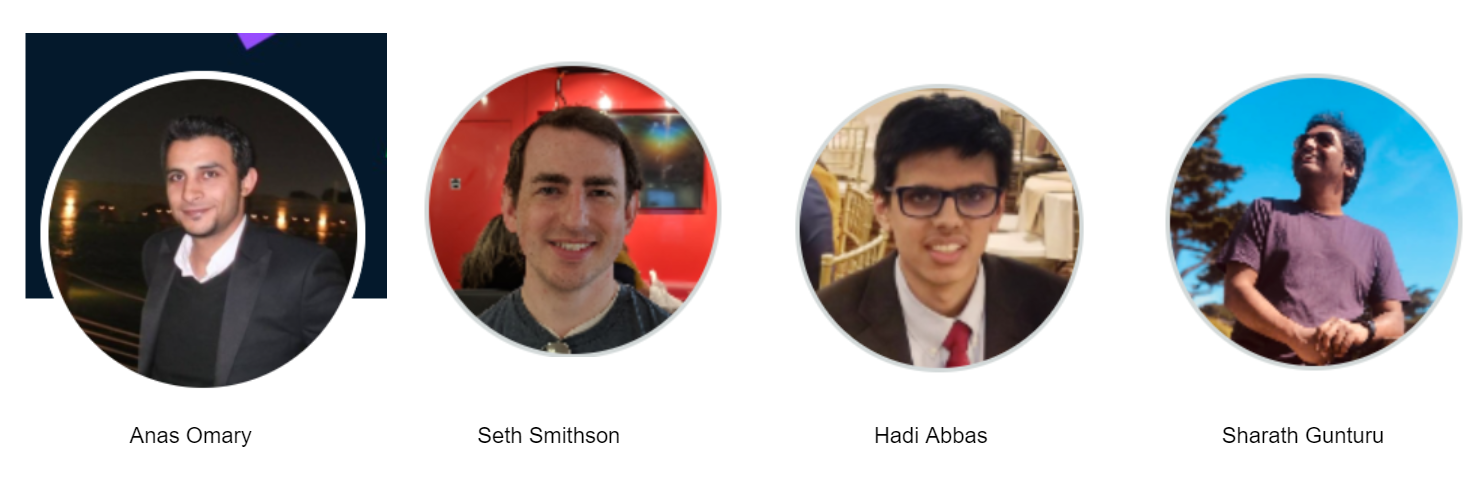

# Date:  05APR2022

# Assignment:  Home Credit Default Risk (HCDR) Project
---



ABSTRACT

Many people struggle to get home loans due to insufficient or non-existent credit histories. Moreover, unfortunately, this population is often taken advantage of by untrustworthy lenders. Companies like Home Credit strive to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. To make sure this underserved population has a positive loan experience, Home Credit uses a variety of alternative data (e.g., including telco and transactional information) to predict their clients' repayment abilities and minimize risk to the business.

Following our exploratory data analysis and baseline model construction in the previous phase, we proceeded to additional feauture engineering and hyperparamater tuning. In this stage, we tuned logistic regression, XGBoost, random forest, and multilayer perceptron models. The best parameter values for each model were chosen through GridSearchCV. Following the training and analysis, we selected XGBoost as our best performing model with a kaggle public score of 0.782. The five most important features for our XGBoost model were APP_EXT_Source_3, APP_EXT_Source_2, APP_SECONDARY, APP_HIGHER_ED, and APP_LOAN_TO_VALUE.


Next, we sought to identify the most important features for the XGBoost model. We also calculated AUC scores for two of the other models: random forest and multilayer perceptron. In the final phase, we expanded upon our findings and implemented a multi layer perceptron neural network in pytorch, after we ran the experiment with MLP we achieved an accuracy of (0.755) which is still less than the best score we got with XGBoost.

---

DATA

This project will use data provided by Home Credit through Kaggle (https://www.kaggle.com/c/home-credit-default-risk/data).

The dataset contains details about the borrower that are grouped into multiple related tables, which contain applicants' master data such as age, gender, number of family members, etc. In addition to previous credit history from the credit bureau department, and the credit history as per the Home Credit Group itself. There are a total of 9 data files, 8 out of which will be used, 7 of the 8 files will be used for training and evaluation and one will be used for testing.

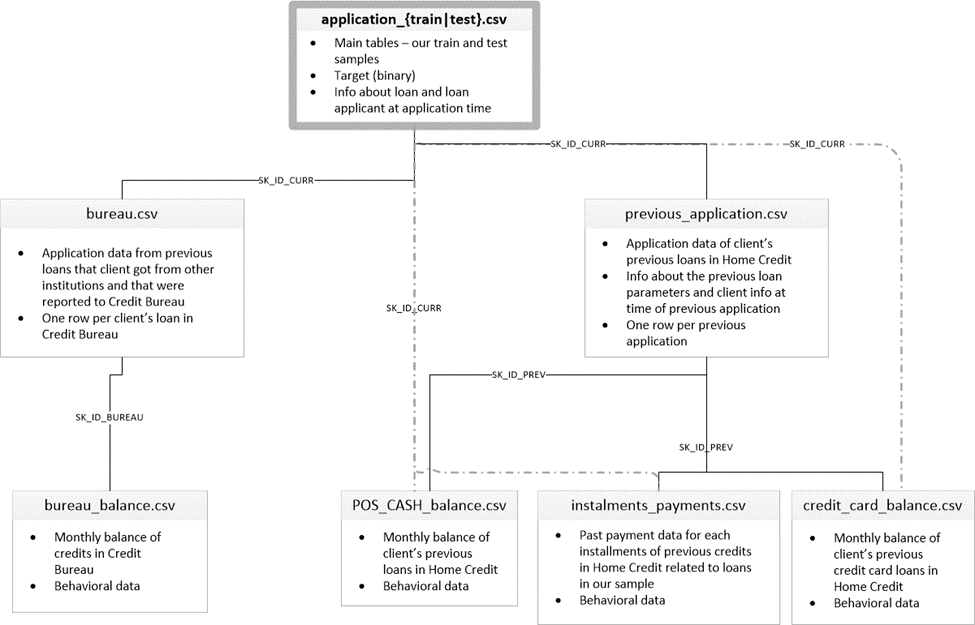

As per the above diagram, we can see that one field (SK_ID_CURR) is used to link all tables except for bearu_balance.csv which is linked to bureau.csv table through SK_ID_Bearu which is great because it will be possible to easily join all tables with application_train.csv.

The dataset contains 196 unique columns 122 of which are in application_train table, there are 307,511 total applications in application_train table, the target label exists in application_train and does not exist in application_test table, it is a binary field (0: will repay on time and 1: will not repay on time), since application_train contains the majority of features, the approach will be to start with features in this table and expand the feature selection from other tables.


---

ALGORITHMS

Since the Home Credit Default Risk is a classification problem, we will focus on using classification algorithms and will then compare the results from each algorithm and select a winner, we will potentially implement logistic regression, k-nearest neighbor, random forest and XGBoost, following are the reasons why we decided to implement the mentioned algorithms:


*   Logistic regression: Easy to implement, well researched, has many resources online and all in all a great baseline model.
*   K-nearest neighbor: A great baseline model, it has low calculation time and is usually used when there is little to no knowledge of the dataset.
*   Random forest: It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed, it is Great with High dimensionality, Quick Prediction/Training Speed, Robust to Outliers and Non-linear Data.
*   XGBoost: Some of the major benefits of XGBoost are that it is highly scalable/parallelizable, quick to execute, and typically outperforms other algorithms.
*   MLP classifier.
*   multi-layer perception (MLP) NN model in PyTorch.

---


METRICS

Since the target variable is binary, there are two possible scenarios for errors:
*   Scenario 1: if the model predicts the client will repay the loan but in reality, the client has defaulted.
*   Scenario 2: if the model predicts client default but in reality, the client has repaid the loan.

After a quick check on the dataset, we found that the number of clients who repaid their loan (282,686) is much higher than clients who defaulted (24,825) which means accuracy will not be immensely helpful, instead, we will use the following metrics:
*   Recall: We will rely on this metric to identify true positive rate (clients who were predicted to default and actually defaulted).
*   Precision: to complement the recall metric and understand the proportion of positive predictions that are actually correct. 
*   F-1 score: to get a final answer on which model is giving better results.

PIPELINES

We will implement the following pipelines:


1.   Data processing pipeline: this pipeline will standardize data, fill or impute missing values, and encode categorical data if needed and perform feature extraction to generate, merge and extract features from dataset.
2.   Feature selection pipeline: this will determine what key variables to focus the analysis on and establish the importance of the different features in the dataset.
3.   Classification pipeline: this pipeline will classify each application as either having the ability to repay the loan or not be able to repay the loan based on the feature selection and each individual or ensemble method. 
4.   Parent pipeline: this will run all other pipelines in addition to each classification model pipeline.

TEAM MEMBERS AND ROLES
*   Data processing pipeline:  Sarath
*   Feature selection pipeline:  Hadi
*   Parent pipeline:  Seth & Anas
*   Logistic regression model:  Sarath
*   K-nearest neighbor model:  Seth
*   Random forest model:  Hadi
*   XGBoost model:  Anas
*   Fine tuning and final touches:  All members

**Updated Task Completion Timeline**

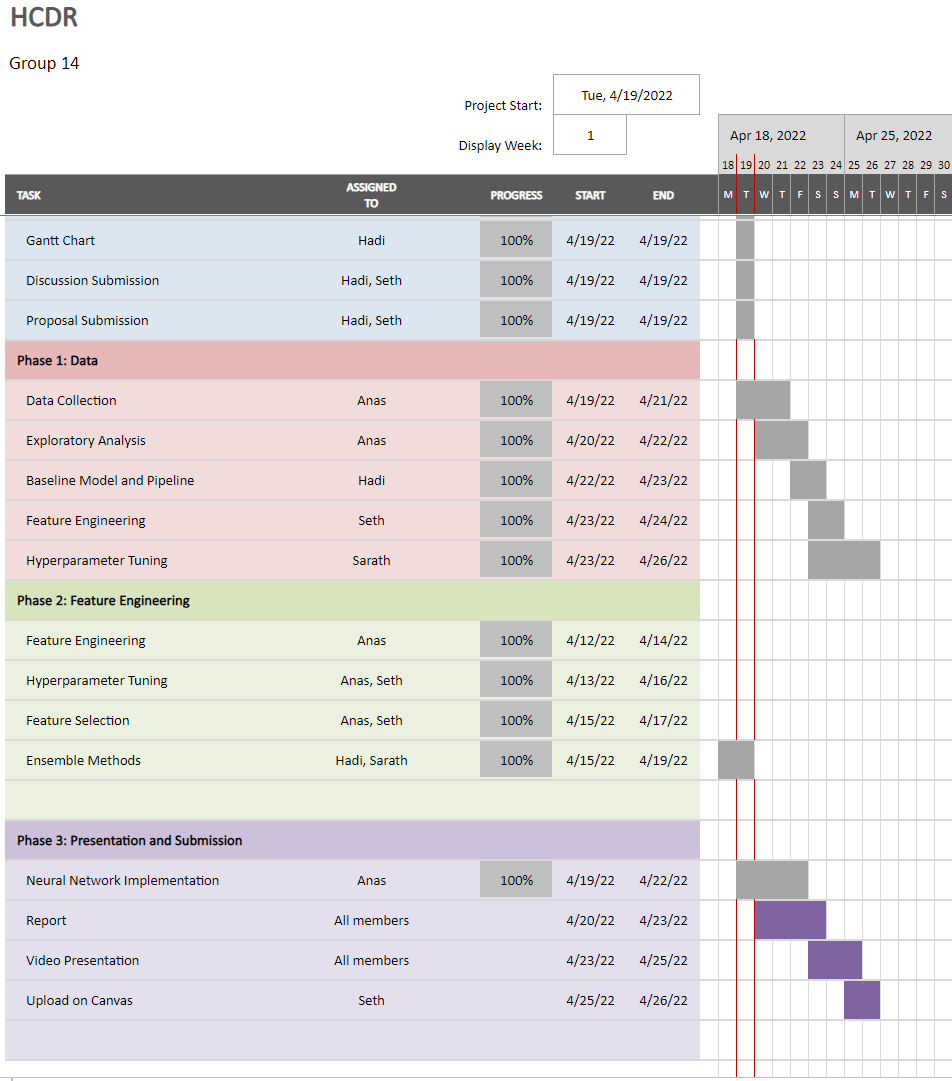

**Model workflow**

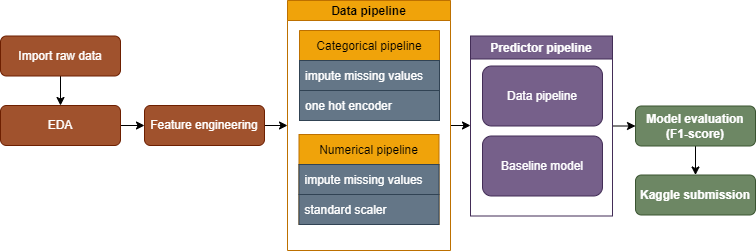

First, let's update and load the tools we are going to need.

In [ ]:
# Now, Let's import relevant python libraries

### load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from time import time
import json
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import warnings
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
    
import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

#for 100% jupyter notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
###########################################################################################
## Data Processing Libraries!
import numpy as np
import pandas as pd

# Import a dependency for vizualiztion
import matplotlib.pyplot as plt
import seaborn as sns

## ML Library!
import sklearn
# import pyforest

# Importing pprint for better print displays of hyperparameters
from pprint import pprint

# Importing character detect to examine the encoding of the csv files
import chardet

# Helpful Library for datetime functions
from datetime import datetime

# Importing libraries to make using Google Colab easier


In [ ]:
!pip install xgboost -U

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'



```
# This is formatted as code
```

# Data Collection

Connecting to kaggle competition and download the files

In [ ]:
!pip install kaggle

In [ ]:
conda install posix

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\anaso\anaconda3

  added / updated specs:
    - posix


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.12.0-py38haa244f~ --> pkgs/main::conda-4.12.0-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!rm -rf ~/.kaggle

In [ ]:
!pwd

/c/Users/anaso/Downloads/AML_ASS_LAB/Project/Notebooks/PH03


In [ ]:
import json
token = {"username":"anasomary","key":"d0914506b890fa4b6b9a9466f555de38"} #create in kaggle setting
with open("kaggle.json", "w") as file:
    json.dump(token, file)

In [ ]:
!mkdir ~\.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp C:/Users/anaso/Downloads/AML_ASS_LAB/Project/Notebooks/PH03/kaggle/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  


In [ ]:
dataset_dir = r"C:\Users\anaso\Downloads\AML_ASS_LAB\Project\Notebooks\PH03\Datasets"

In [ ]:
#verify we have the needed files
!ls -l $dataset_dir

total 3326068
-rw-r--r-- 1 anaso anaso     37383 Dec 11  2019 HomeCredit_columns_description.csv
-rw-r--r-- 1 anaso anaso 392703158 Dec 11  2019 POS_CASH_balance.csv
-rw-r--r-- 1 anaso anaso  26567651 Dec 11  2019 application_test.csv
-rw-r--r-- 1 anaso anaso 166133370 Dec 11  2019 application_train.csv
-rw-r--r-- 1 anaso anaso 170016717 Dec 11  2019 bureau.csv
-rw-r--r-- 1 anaso anaso 375592889 Dec 11  2019 bureau_balance.csv
-rw-r--r-- 1 anaso anaso 424582605 Dec 11  2019 credit_card_balance.csv
-rw-r--r-- 1 anaso anaso 721616255 Apr  6 03:07 home-credit-default-risk.zip
-rw-r--r-- 1 anaso anaso 723118349 Dec 11  2019 installments_payments.csv
-rw-r--r-- 1 anaso anaso 404973293 Dec 11  2019 previous_application.csv
-rw-r--r-- 1 anaso anaso    536202 Dec 11  2019 sample_submission.csv


## EDA

**EDA 1.0: Overview**

In this section we will load data tables into pandas data frames and explore basic characteristics of each frame in the dataset like the number of features, column counts and other information using the describe method.
Next we will examine and visualize relation ship between input features and target.

In [ ]:
#here we created a function to dynamically load tables into dataframes, print the table name and shape, 
#show basic information about the table using the info() function and display the first 5 records
def load_data_frame(path, tbl_name):
    df = pd.read_csv(path)
    print(f"{tbl_name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

In [ ]:
#here we are loading each table and saving table information into a dictionary to access table information quickly and easily
tbl_dict={}
tbls = ("previous_application","application_train", "application_test", "bureau", "bureau_balance",
           "POS_CASH_balance","credit_card_balance", "installments_payments"
           )
for tbl in tbls:
    tbl_dict[tbl] = load_data_frame(os.path.join(dataset_dir, f'{tbl}.csv'), tbl)

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
#here we will view row count and column count for each table
for tbl in tbl_dict.keys():
    print(f'table {tbl:24}: [rows= {tbl_dict[tbl].shape[0]:10,}, columns= {tbl_dict[tbl].shape[1]}]')

table previous_application    : [rows=  1,670,214, columns= 37]
table application_train       : [rows=    307,511, columns= 122]
table application_test        : [rows=     48,744, columns= 121]
table bureau                  : [rows=  1,716,428, columns= 17]
table bureau_balance          : [rows= 27,299,925, columns= 3]
table POS_CASH_balance        : [rows= 10,001,358, columns= 8]
table credit_card_balance     : [rows=  3,840,312, columns= 23]
table installments_payments   : [rows= 13,605,401, columns= 8]


**EDA 1.1: Applications**

In this section we will explore application_train and application_test tables, the only difference between the two tables in terms of structure is that application_train has the target column and application_test doesn't. 

**application_train**

In [ ]:
application_train = tbl_dict['application_train']
print('application_train:')
print('-'*80)
print(f'Shape: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*100)
display(application_train.head())
print('-'*80)
print(f'Basic statistics:')
print('\n')
print(application_train.describe())

application_train:
--------------------------------------------------------------------------------
Shape: (307511, 122)
--------------------------------------------------------------------------------
Number of duplicate values: 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

--------------------------------------------------------------------------------
Basic statistics:


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.50

**application_test**

In [ ]:
application_test = tbl_dict['application_test']
print('application_test:')
print('-'*80)
print(f'Shape: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)
display(application_test.head())
print('-'*80)
print(f'Basic statistics:')
print('\n')
print(application_test.describe())

application_test:
--------------------------------------------------------------------------------
Shape: (48744, 121)
--------------------------------------------------------------------------------
Number of duplicate values: 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

--------------------------------------------------------------------------------
Basic statistics:


          SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.01

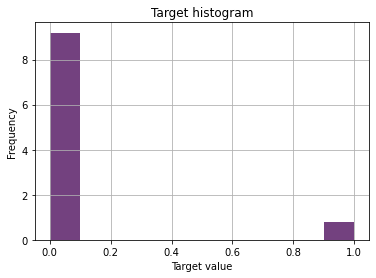

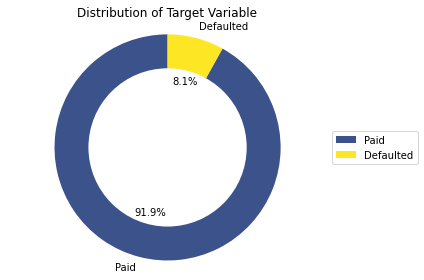

In [ ]:
from matplotlib.colors import Colormap
n, bins, patches = plt.hist(application_train.TARGET, density=True, facecolor='#440154', alpha=0.75)


plt.xlabel('Target value')
plt.ylabel('Frequency')
plt.title('Target histogram')
plt.grid(True)

target_distribution = application_train.TARGET.value_counts()
labels = ['Paid', 'Defaulted']
sizes = target_distribution #colors
colors = ['#3b528b','#fde725']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

ax1.legend(title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title("Distribution of Target Variable")
plt.tight_layout()
plt.show()


*Around 92% of applicants paid their loans, only about 8% defaulted.*

**EDA 1.1.1: numerical and categorical features**

In [ ]:
#here we separate numerical columns based on the data type
numerical_columns = tbl_dict["application_train"].select_dtypes(include=['int64', 'float64']).columns
categorical_columns = tbl_dict["application_train"].select_dtypes(include=['object', 'bool']).columns
cat_feats = list(categorical_columns)
num_feats = list(numerical_columns)
print(str(len(num_feats)),'Numerical Features:','\n',num_feats)
print('-'*140)
print('\n')
print(str(len(cat_feats)),'Categorical Features:','\n', cat_feats)

106 Numerical Features: 
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGI

**EDA 1.1.2: correlation**

In this section we will examine correlation between variables and target, we will start by listing the top 10 correlated variables:

In [ ]:
var_corrs = application_train.corr()['TARGET'].sort_values()
pos_corr = var_corrs[var_corrs > 0].sort_values(ascending=False).drop('TARGET')[:10]
neg_corr = var_corrs[var_corrs < 0].sort_values(ascending=True)[:10]
print("Variables that are positively correlated:",'\n', pos_corr)
print('\n')
print("Variables that are negatively correlated:",'\n', neg_corr)

Variables that are positively correlated: 
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


Variables that are negatively correlated: 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


*We notice that that variables EXIT_SOURCE_3 and DAYS_BIRTH have the heighest correlation with target, we will start with those two variables* 

Visualizing positive correlations:

<AxesSubplot:>

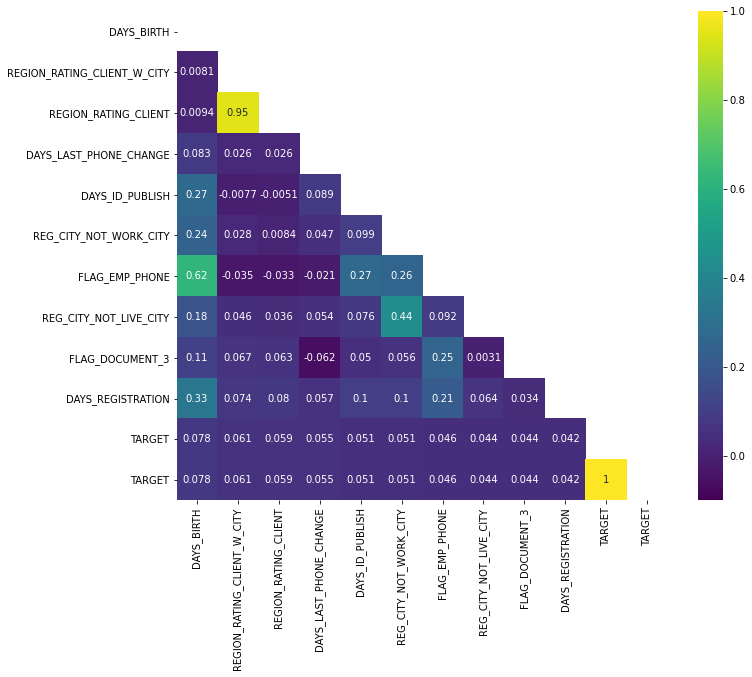

In [ ]:
pos_corr_cols = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY',
        'FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','DAYS_REGISTRATION',"TARGET"]

corr = application_train[pos_corr_cols + ['TARGET']].corr()
msk = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=msk,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True, annot_kws={"size": 10},
            vmin=-0.1, vmax=1,
            cmap ="viridis")

*We notice that both variables REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are highly correlated, so we will only use one of them in our model*

Visualizing negative correlations:

<AxesSubplot:>

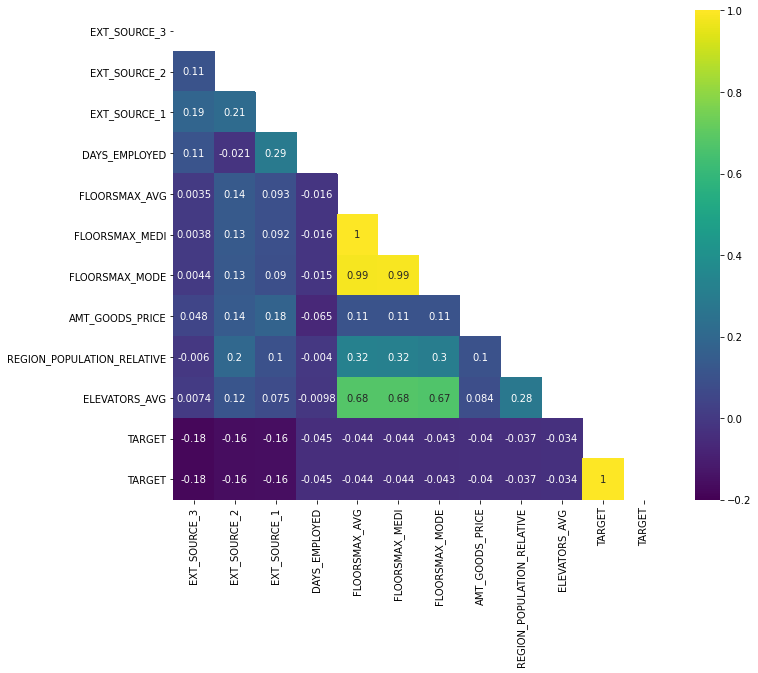

In [ ]:
neg_corr_cols = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_EMPLOYED','FLOORSMAX_AVG','FLOORSMAX_MEDI',
        'FLOORSMAX_MODE','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG',"TARGET"]
corr = application_train[neg_corr_cols + ['TARGET']].corr()
msk = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=msk,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True, annot_kws={"size": 10},
            vmin=-0.2, vmax=1,
            cmap ="viridis")

*We notice that variables FLOORSMAX_AVG, FLOORSMAX_MEDI and FLOORSMAX_MODE are highly correlated, so we will only use one of them in our model*

**EDA 1.1.3: Missing values**

In this section we will identify and visualize columns for missing values as missing values can have a big negative impact on the model performance, we will decide later on the method in which we will impute missing values, we might also ignore columns with mostly missing values. 

In [ ]:
cols_missing_values = len(application_train.isnull().sum()[application_train.isnull().sum() > 0])
total_cols = application_train.shape[1] - 1
print("There are {} columns with missing values out of {} total columns".format(cols_missing_values, total_cols))
print('-'*100)

cols_missing_propportion = application_train.isnull().sum()/application_train.shape[0] * 100
top10_missing_values = cols_missing_propportion[cols_missing_propportion > 50]
top10_missing_values_index = top10_missing_values.index.tolist()
print("There are {} columns with more than 50% missing values".format(len(top10_missing_values_index)))
print('-'*100)
print("Top 10 columns missing values:",'\n')
top10_missing_values.sort_values(ascending=False)[:10]


There are 67 columns with missing values out of 121 total columns
----------------------------------------------------------------------------------------------------
There are 41 columns with more than 50% missing values
----------------------------------------------------------------------------------------------------
Top 10 columns missing values: 



COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
dtype: float64

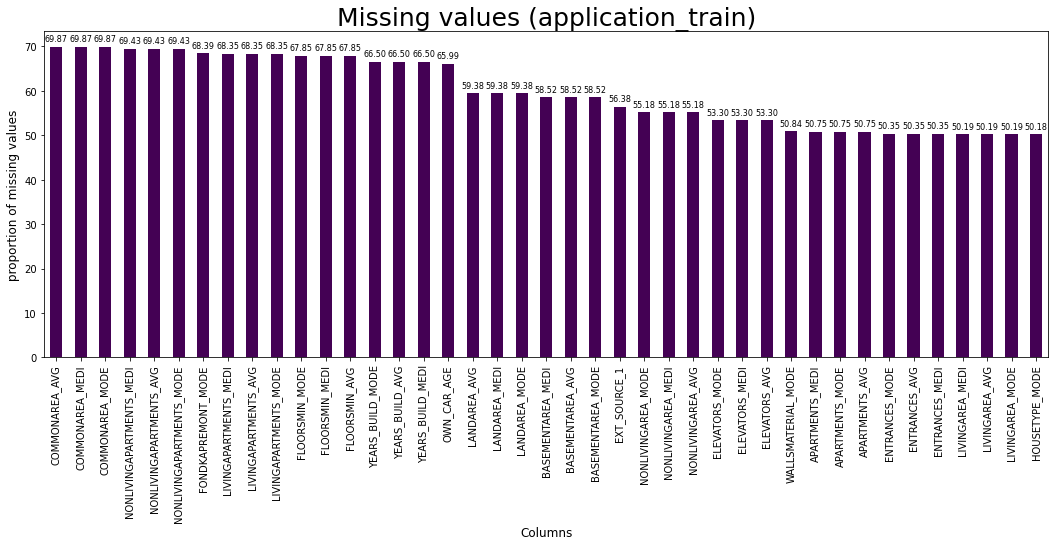

In [ ]:
#Visualizing columns with high number of missing values >50% for application_train
ax = cols_missing_propportion[cols_missing_propportion > 50].sort_values(ascending=False).plot(kind ='bar',colormap = 'viridis',figsize = (18,6))

ax.set_title("Missing values (application_train)", fontsize =25)
ax.set_xlabel("Columns",fontsize =12)
ax.set_ylabel(" proportion of missing values ",fontsize =12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

Next we will identify and visualize missing values for the test dataset

In [ ]:
cols_missing_values_t = len(application_test.isnull().sum()[application_test.isnull().sum() > 0])
total_cols_t = application_test.shape[1] - 1
print("There are {} columns with missing values out of {} total columns".format(cols_missing_values_t, total_cols_t))
print('-'*100)

cols_missing_propportion_t = application_test.isnull().sum()/application_test.shape[0] * 100
top10_missing_values = cols_missing_propportion_t[cols_missing_propportion_t > 50]
top10_missing_values_index = top10_missing_values.index.tolist()
print("There are {} columns with more than 50% missing values".format(len(top10_missing_values_index)))
print('-'*100)
print("Top 10 columns missing values:",'\n')
top10_missing_values.sort_values(ascending=False)[:10]

There are 64 columns with missing values out of 120 total columns
----------------------------------------------------------------------------------------------------
There are 29 columns with more than 50% missing values
----------------------------------------------------------------------------------------------------
Top 10 columns missing values: 



COMMONAREA_MODE             68.716150
COMMONAREA_AVG              68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_MEDI    68.412523
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
FONDKAPREMONT_MODE          67.284179
LIVINGAPARTMENTS_MEDI       67.249302
LIVINGAPARTMENTS_AVG        67.249302
LIVINGAPARTMENTS_MODE       67.249302
dtype: float64

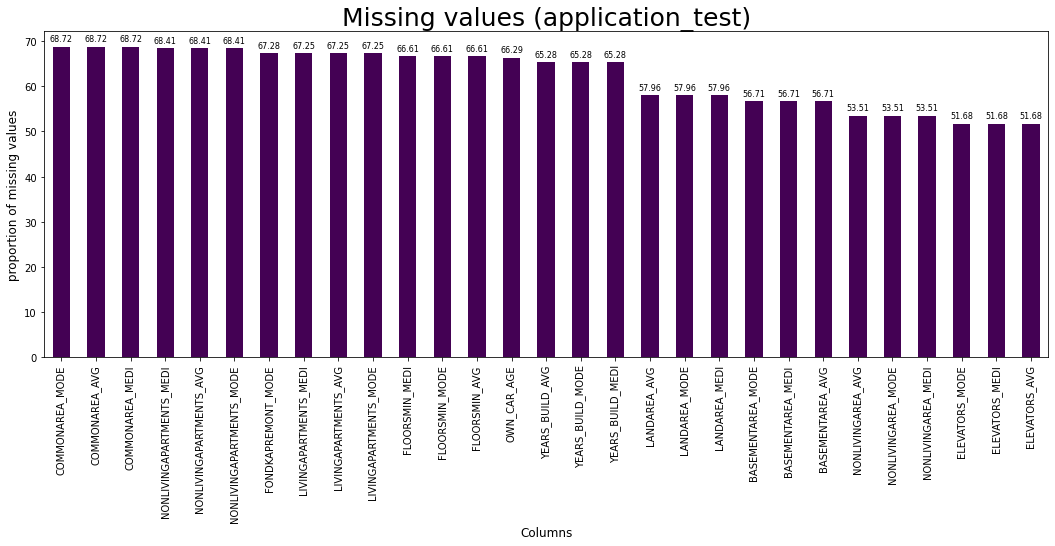

In [ ]:
#Visualizing columns with high number of missing values >50% for application_test
ax = cols_missing_propportion_t[cols_missing_propportion_t > 50].sort_values(ascending=False).plot(kind ='bar',colormap = 'viridis',figsize = (18,6))

ax.set_title("Missing values (application_test)", fontsize =25)
ax.set_xlabel("Columns",fontsize =12)
ax.set_ylabel(" proportion of missing values ",fontsize =12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

**EDA 1.1.4: Categorical data**

In this section we will explore categorical data and try to find insights

In [ ]:
#Here we created this function to dynamically print properties and statistics of each categorical column
def cat_col_summary(df, cat_colname):
    print(cat_colname, ':')
    print('Value counts:\n', df[cat_colname].value_counts())
    print('NaN: ', df[cat_colname].isnull().sum())
    print('Average default rate:\n',
          df.groupby(cat_colname)['TARGET'].mean().round(3))
    return '\n'
for col in cat_feats:
    print(cat_col_summary(application_train, col))

NAME_CONTRACT_TYPE :
Value counts:
 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
NaN:  0
Average default rate:
 NAME_CONTRACT_TYPE
Cash loans         0.083
Revolving loans    0.055
Name: TARGET, dtype: float64


CODE_GENDER :
Value counts:
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
NaN:  0
Average default rate:
 CODE_GENDER
F      0.070
M      0.101
XNA    0.000
Name: TARGET, dtype: float64


FLAG_OWN_CAR :
Value counts:
 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
NaN:  0
Average default rate:
 FLAG_OWN_CAR
N    0.085
Y    0.072
Name: TARGET, dtype: float64


FLAG_OWN_REALTY :
Value counts:
 Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
NaN:  0
Average default rate:
 FLAG_OWN_REALTY
N    0.083
Y    0.080
Name: TARGET, dtype: float64


NAME_TYPE_SUITE :
Value counts:
 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B     

Value counts:
 block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64
NaN:  154297
Average default rate:
 HOUSETYPE_MODE
block of flats      0.069
specific housing    0.101
terraced house      0.085
Name: TARGET, dtype: float64


WALLSMATERIAL_MODE :
Value counts:
 Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64
NaN:  156341
Average default rate:
 WALLSMATERIAL_MODE
Block           0.070
Mixed           0.075
Monolithic      0.047
Others          0.083
Panel           0.063
Stone, brick    0.074
Wooden          0.097
Name: TARGET, dtype: float64


EMERGENCYSTATE_MODE :
Value counts:
 No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64
NaN:  145755
Average default rate:
 EMERGENCYSTATE_MODE
No     0.070
Yes    0.096
Name: TARGET, dtype: float64




Visualizing contract types with respect to Target


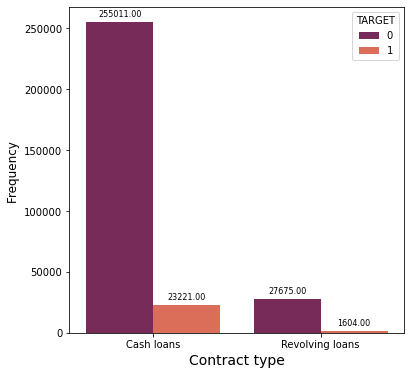

In [ ]:
print(f"Visualizing contract types with respect to Target")#= {len(application_train['NAME_CONTRACT_TYPE'].unique())}")
plt.figure(figsize=(6, 6))
#sns.color_palette("viridis", as_cmap=True)
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=application_train,palette="rocket")
ax.set_xlabel("Contract type",fontsize =14)
ax.set_ylabel("Frequency ",fontsize =12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

*Here we notice that there are more cash loans than revolving loans, also more people have defaulted on cash loans than on revolving loans*

Visualizing gender with respect to target


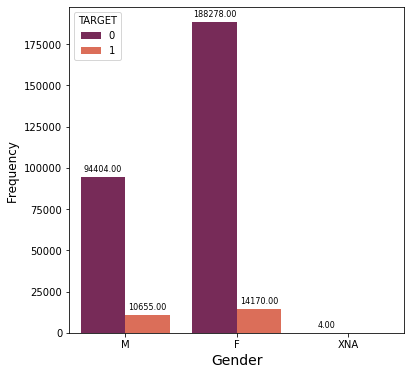

In [ ]:
print(f"Visualizing gender with respect to target")# = {len(application_train['CODE_GENDER'].unique())}")

plt.figure(figsize=(6, 6))
ax = sns.countplot(x="CODE_GENDER", hue="TARGET", data=application_train,palette="rocket")
ax.set_xlabel("Gender",fontsize =14)
ax.set_ylabel("Frequency ",fontsize =12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

*We notice that there are more female applicants than males, and we notice that more males have defaulted on their loan than females, we also notice an invalid gender value XNA which should be fixed*

**EDA 1.1.5: Numerical data**

In this section we will explore numerical data and try to find insights, we will first examine the relationship between each pair of variables with respect to the target class using pair plot.

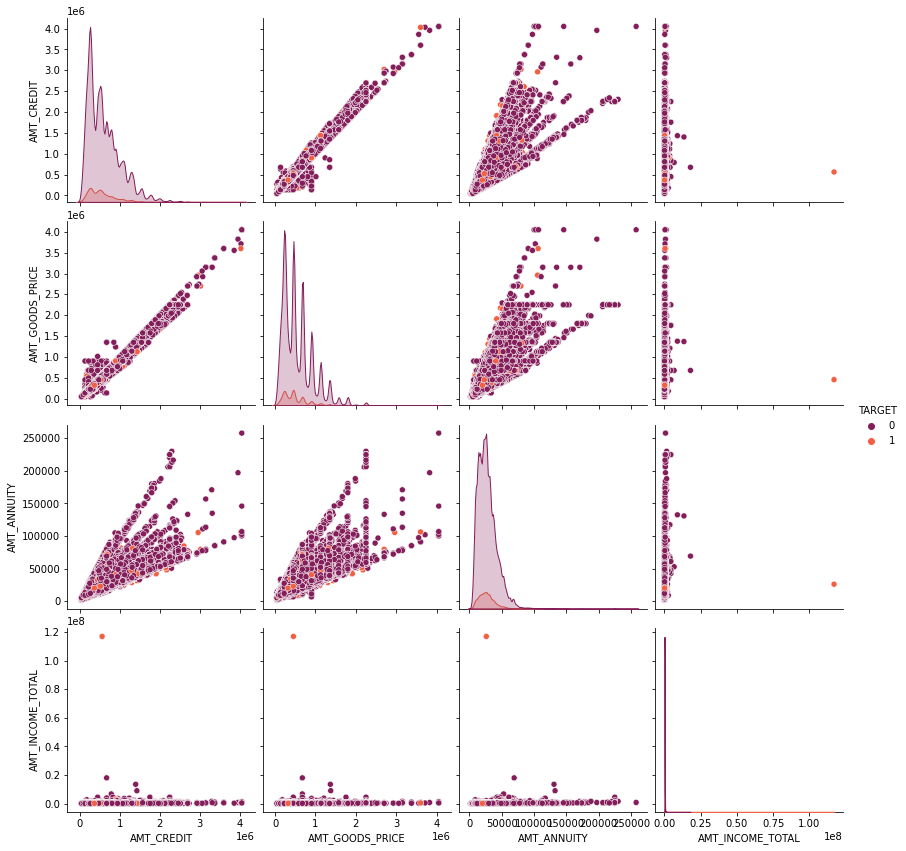

In [ ]:

features = ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL']
sns.pairplot(data = application_train, hue="TARGET", vars = features, height=3,palette="rocket")

Next we will show the value distribution of each column with respect to target

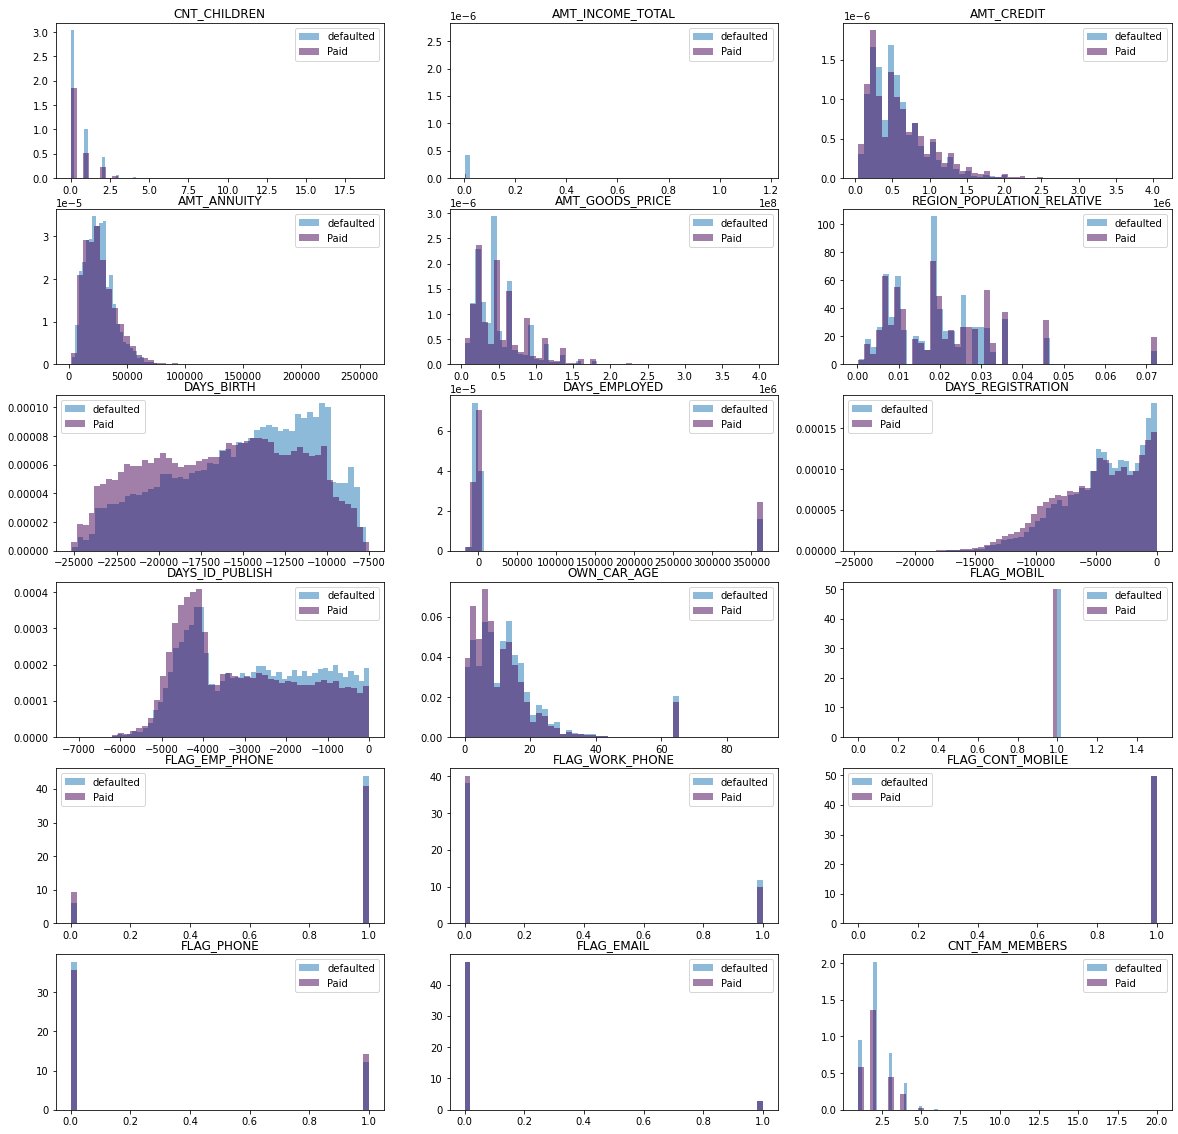

In [ ]:
defaulted = application_train[application_train.TARGET==1].copy(deep=True)
paid = application_train[application_train.TARGET==0].copy(deep=True)
fig = plt.figure(figsize=(20,20))
for i in range(1,19):   
    plt.subplot(6,3,i)
    plt.hist(defaulted[num_feats[i+1]], bins=50, density=True,alpha=0.5, label='defaulted')
    plt.hist(paid[num_feats[i+1]], bins=50, density=True,color='#440154', alpha=0.5, label='Paid')
    plt.legend()
    plt.title(num_feats[i+1])
    plt.legend()

We seem to have extreme values in AMT_INCOME_TOTAL and negatibe work days in DAYS_EMPLOYED. 

In [ ]:
print('Count of positive DAYS_EMPLOYED:', len(application_train[application_train.DAYS_EMPLOYED>0]))
print('Count of negative DAYS_EMPLOYED:', len(application_train[application_train.DAYS_EMPLOYED<0]))

Count of positive DAYS_EMPLOYED: 55374
Count of negative DAYS_EMPLOYED: 252135


Text(0.5, 0, 'Days Employed')

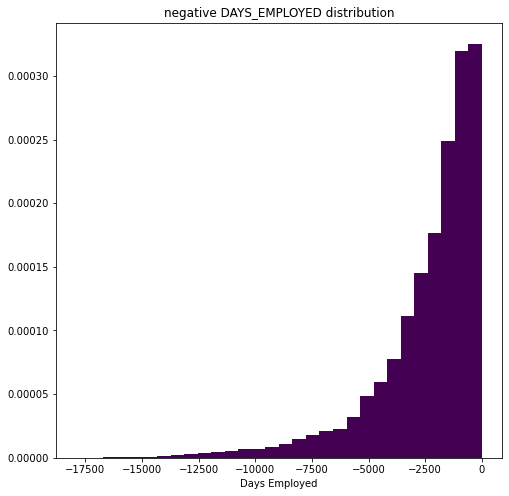

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.hist(application_train[application_train.DAYS_EMPLOYED<0].DAYS_EMPLOYED, bins=30, density=True,color='#440154')
plt.title('negative DAYS_EMPLOYED distribution')
plt.xlabel('Days Employed')

Negative days to be imputed.

**EDA 1.1.6 Concluded list of features from application dataset**

Following is the list of features to be carried out from application dataset to be processed later for modeling.

In [ ]:
#numerical features to be  imputed
app_num_features= [
            'AMT_CREDIT',
            'AMT_GOODS_PRICE',
            'DAYS_LAST_PHONE_CHANGE',
            'DAYS_REGISTRATION',                   
            'DAYS_BIRTH',
            'DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE',
            'AMT_ANNUITY',
            'EXT_SOURCE_2'
]
#numerical features for custom transformation
app_num_cust_features = [
            'AMT_INCOME_TOTAL',
            'DAYS_EMPLOYED',
            
]
#categorical features to be imputed
app_cat_features = [
                'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'REGION_RATING_CLIENT',
                'REG_CITY_NOT_LIVE_CITY',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_6',                    
                'NAME_CONTRACT_TYPE',
                'CODE_GENDER',
                'FLAG_OWN_CAR',
                'FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE',
                'NAME_INCOME_TYPE',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_18',
                'OCCUPATION_TYPE'
                ]

#categorical features for custom transformation
app_cat_cust_features = [
                'CNT_CHILDREN',
                'HOUR_APPR_PROCESS_START',
                'AMT_REQ_CREDIT_BUREAU_QRT',
                'DEF_30_CNT_SOCIAL_CIRCLE'
]





**EDA 1.2: Bureau**

In this part we will explore bureau datasets; bureau and bureau_balance both datasets share the column SK_ID_BUREAU, we will first verify if both tables can be joined using this column

In [ ]:
#here we will check if there are any records exist in bureau and not in bureau_balance and how many.
print("Number of records exist in bureau and not in bureau_balance:",len(tbl_dict["bureau"]["SK_ID_BUREAU"].unique()) - len(np.intersect1d(tbl_dict["bureau"]["SK_ID_BUREAU"], tbl_dict["bureau_balance"]["SK_ID_BUREAU"])) )
print("Number of records exist in bureau and bureau_balance:",len(np.intersect1d(tbl_dict["bureau"]["SK_ID_BUREAU"], tbl_dict["bureau_balance"]["SK_ID_BUREAU"])))

Number of records exist in bureau and not in bureau_balance: 942074
Number of records exist in bureau and bureau_balance: 774354


*We can see that majority of records in bureau table don't have a record in bureau_balance.*

In [ ]:
bureau_tbl = tbl_dict['bureau']
print("Bureau.csv")
print('-'*50)
print(f'Shape : {bureau_tbl.shape}')
print('-'*100)
print(f'Duplicate value count: {bureau_tbl.shape[0] - bureau_tbl.duplicated().shape[0]}')
print('-'*100)
print(f'Describe bureau.csv:')
print('\n')
print(bureau_tbl.describe())

Bureau.csv
--------------------------------------------------
Shape : (1716428, 17)
----------------------------------------------------------------------------------------------------
Duplicate value count: 0
----------------------------------------------------------------------------------------------------
Describe bureau.csv:


         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE

In [ ]:
bureau_balance_tbl = tbl_dict['bureau_balance']
print("Bureau_balance.csv")
print('-'*50)
print(f'Shape : {bureau_balance_tbl.shape}')
print('-'*100)
print(f'Duplicate value count: {bureau_balance_tbl.shape[0] - bureau_balance_tbl.duplicated().shape[0]}')
print('-'*100)
print(f'Describe bureau_balance.csv:')
print('\n')
print(bureau_balance_tbl.describe())

Bureau_balance.csv
--------------------------------------------------
Shape : (27299925, 3)
----------------------------------------------------------------------------------------------------
Duplicate value count: 0
----------------------------------------------------------------------------------------------------
Describe bureau_balance.csv:


       SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00


**EDA 1.2.1: Numerical and categorical features**

In this section we will explore numerical and categorical features.

In [ ]:
num_feats_bureau = tbl_dict["bureau"].select_dtypes(include=['int64', 'float64']).columns
cat_feats_bureau = tbl_dict["bureau"].select_dtypes(include=['object', 'bool']).columns
num_feats_bureau_balance = tbl_dict["bureau_balance"].select_dtypes(include=['int64', 'float64']).columns
cat_feats_bureau_balance = tbl_dict["bureau_balance"].select_dtypes(include=['object', 'bool']).columns
print(f"Numerical features (Bureau): {list(num_feats_bureau)}")
print()
print(f"Categorical features (Bureau): {list(cat_feats_bureau)}")
print()
print(f"Numerical features (Bureau_Balance): {list(num_feats_bureau_balance)}")
print()
print(f"BCategorical features (Bureau_Balance): {list(cat_feats_bureau_balance)}")

Numerical features (Bureau): ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

Categorical features (Bureau): ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

Numerical features (Bureau_Balance): ['SK_ID_BUREAU', 'MONTHS_BALANCE']

BCategorical features (Bureau_Balance): ['STATUS']


CREDIT_ACTIVE unique value count = 4


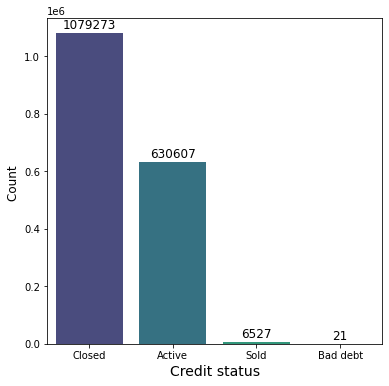

In [ ]:
print(f"CREDIT_ACTIVE unique value count = {len(bureau_tbl['CREDIT_ACTIVE'].unique())}")
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="CREDIT_ACTIVE", data=tbl_dict["bureau"],palette='viridis')
ax.set_xlabel("Credit status",fontsize =14)
ax.set_ylabel("Count ",fontsize =12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Majority of credit are either closed or active

CREDIT_CURRENCY unique value count = 4


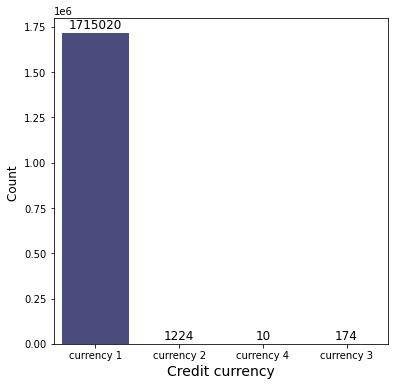

In [ ]:
print(f"CREDIT_CURRENCY unique value count = {len(bureau_tbl['CREDIT_CURRENCY'].unique())}")
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="CREDIT_CURRENCY", data=tbl_dict["bureau"],palette='viridis')
ax.set_xlabel("Credit currency",fontsize =14)
ax.set_ylabel("Count ",fontsize =12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Majority of credit are in currency 1, we don't actually know what the other currencies are, and most likely we will ignore observations with currency other than currency 1

CREDIT_TYPE unique value count = 15


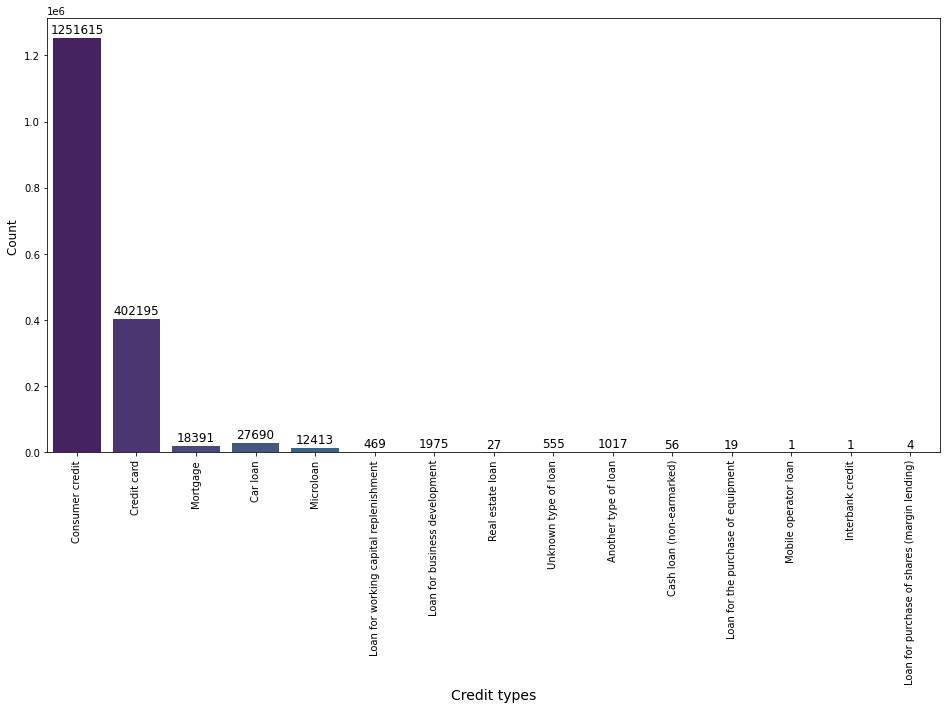

In [ ]:
print(f"CREDIT_TYPE unique value count = {len(bureau_tbl['CREDIT_TYPE'].unique())}")
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="CREDIT_TYPE", data=tbl_dict["bureau"],palette='viridis')
ax.set_xlabel("Credit types",fontsize =14)
ax.set_ylabel("Count ",fontsize =12)
plt.xticks(rotation=90)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Majority of credit are of types consumer credit and credit card

Text(0, 0.5, 'Frequency')

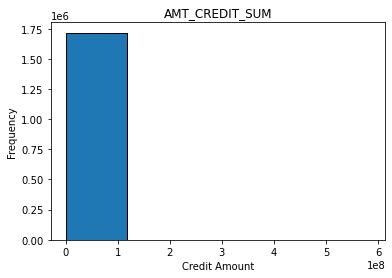

In [ ]:
plt.hist(bureau_tbl.AMT_CREDIT_SUM, edgecolor = 'k', bins = 5)
plt.title('AMT_CREDIT_SUM') 
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')

In [ ]:
print('-'*50)
print("AMT_CREDIT_SUM stats:")
bureau_tbl.AMT_CREDIT_SUM.describe()

--------------------------------------------------
AMT_CREDIT_SUM stats:


count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64

Text(0, 0.5, 'Frequency')

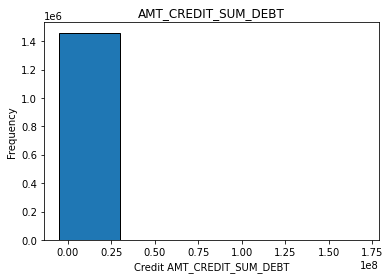

In [ ]:
plt.hist(bureau_tbl.AMT_CREDIT_SUM_DEBT, edgecolor = 'k', bins = 5)
plt.title('AMT_CREDIT_SUM_DEBT') 
plt.xlabel('Credit AMT_CREDIT_SUM_DEBT')
plt.ylabel('Frequency')

**EDA 1.2.2: Missing values**

In [ ]:
#here we are counting the total missing values for each column in bureau and showing them in one dataframe
bureau_missing_prct = (tbl_dict["bureau"].isnull().sum()/tbl_dict["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
bureau_missing_sum = tbl_dict["bureau"].isnull().sum().sort_values(ascending = False)
bureau_total_count = tbl_dict["bureau"].isnull().count()
bureau_missing_df  = pd.concat([bureau_missing_prct, bureau_missing_sum, bureau_total_count], axis=1, keys=['Missing_cercent', "Missing_count", "Total_count"])
bureau_missing_df.head(15)

,Missing_cercent,Missing_count,Total_count
AMT_ANNUITY,71.47,1226791,1716428
AMT_CREDIT_MAX_OVERDUE,65.51,1124488,1716428
DAYS_ENDDATE_FACT,36.92,633653,1716428
AMT_CREDIT_SUM_LIMIT,34.48,591780,1716428
AMT_CREDIT_SUM_DEBT,15.01,257669,1716428
DAYS_CREDIT_ENDDATE,6.15,105553,1716428
AMT_CREDIT_SUM,0.00,13,1716428
CREDIT_ACTIVE,0.00,0,1716428
CREDIT_CURRENCY,0.00,0,1716428
DAYS_CREDIT,0.00,0,1716428


*AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE,DAYS_ENDDATE_FACT and AMT_CREDIT_SUM_LIMIT each has more than 30% missing values so they will be discarded for now.*

In [ ]:
#here we are counting the total missing values for each column in bureau_balance and showing them in one dataframe
bureau_bal_missing_prct = (tbl_dict["bureau_balance"].isnull().sum()/tbl_dict["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
bureau_bal_missing_sum = tbl_dict["bureau_balance"].isnull().sum().sort_values(ascending = False)
bureau_bal_total_count = tbl_dict["bureau_balance"].isnull().count()
bureau_bal_missing_df  = pd.concat([bureau_bal_missing_prct, bureau_bal_missing_sum, bureau_bal_total_count], axis=1, keys=['Missing_cercent', "Missing_count", "Total_count"])
bureau_bal_missing_df.head(5)

,Missing_cercent,Missing_count,Total_count
SK_ID_BUREAU,0.0,0,27299925
MONTHS_BALANCE,0.0,0,27299925
STATUS,0.0,0,27299925


**EDA 1.2.3: Concluded list of features**
- We excluded all features from bureau_balance because most values (54%) in bureau cannot be linked with bureau_balance and since we did that, we no longer needed SK_ID_BUREAU as well
- We excluded AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE,DAYS_ENDDATE_FACT and AMT_CREDIT_SUM_LIMIT for having more than 30% missing data.
- We excluded DAYS_CREDIT_ENDDATE, DAYS_CREDIT_UPDATE and DAYS_CREDIT but we might add them later if required.


In [ ]:
bureau_features=['SK_ID_CURR','CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE']

**EDA 1.3: POS_Cash_Balance**

It consists of monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

In [ ]:
pos_cb = tbl_dict['POS_CASH_balance']
print("POS_Cash_Balance")
print('-'*100)
print(f'Shape: {pos_cb.shape}')
print('-'*100)
print(f'Duplicate values count: {pos_cb.shape[0] - pos_cb.duplicated().shape[0]}')
print('-'*100)
print(f'Describe POS_Cash_Balance:')
print('\n')
print(pos_cb.describe())

POS_Cash_Balance
----------------------------------------------------------------------------------------------------
Shape: (10001358, 8)
----------------------------------------------------------------------------------------------------
Duplicate values count: 0
----------------------------------------------------------------------------------------------------
Describe POS_Cash_Balance:


         SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00   

**EDA 1.3.1: Numerical and categorical features**

In [ ]:
num_pos_cb = tbl_dict["POS_CASH_balance"].select_dtypes(include=['int64', 'float64']).columns
cat_pos_cb = tbl_dict["POS_CASH_balance"].select_dtypes(include=['object', 'bool']).columns
pos_num_list = list(num_pos_cb)
pos_cat_list = list(cat_pos_cb)
print("There are (",str(len(pos_num_list)),")",'Numerical Features:','\n',pos_num_list)
print('-'*100)
print('\n')
print("There are (",str(len(pos_cat_list)),")",'Categorical Features:','\n', pos_cat_list)

There are ( 7 ) Numerical Features: 
 ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
----------------------------------------------------------------------------------------------------


There are ( 1 ) Categorical Features: 
 ['NAME_CONTRACT_STATUS']


NAME_CONTRACT_STATUS unique value counts = 9


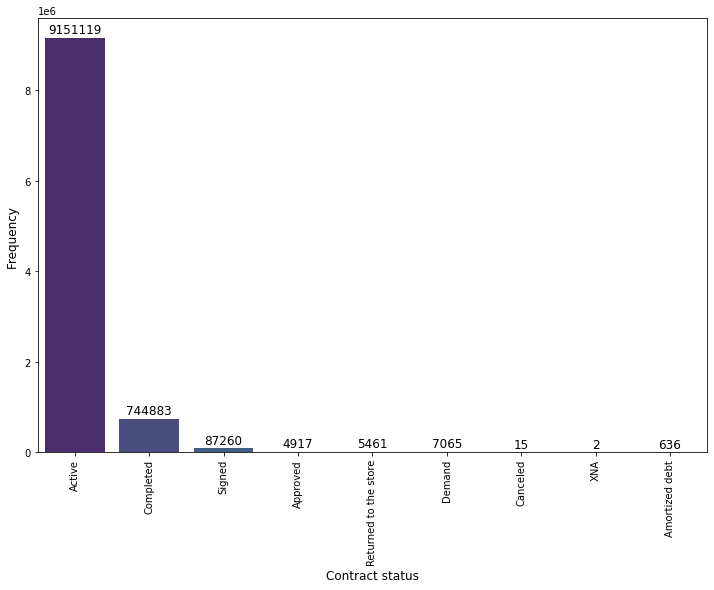

In [ ]:
print(f"NAME_CONTRACT_STATUS unique value counts = {len(pos_cb['NAME_CONTRACT_STATUS'].unique())}")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="NAME_CONTRACT_STATUS", data=tbl_dict["POS_CASH_balance"],palette='viridis')
ax.set_xlabel("Contract status",fontsize =12)
ax.set_ylabel("Frequency ",fontsize =12)
plt.xticks(rotation=90)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Majority of contracts are active and completed, very few contracts are cancelled, there are two contracts with XNA values that can be removed.

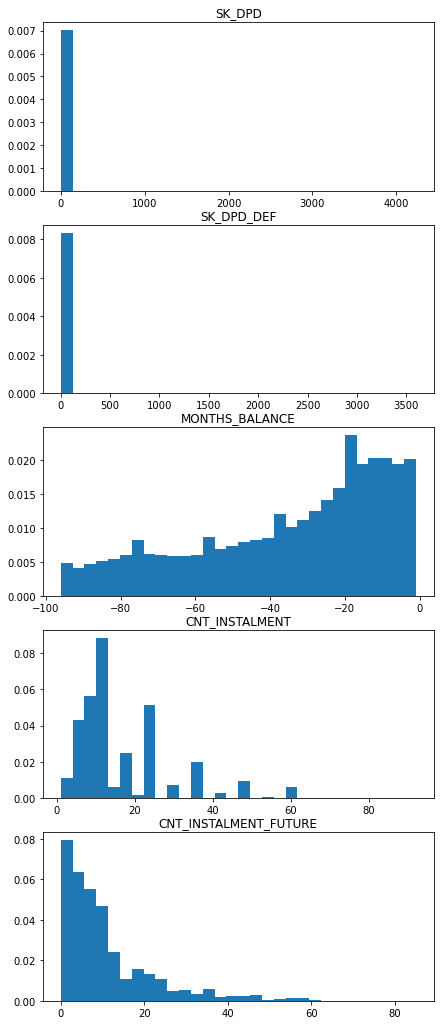

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(7, 18))
axs = axs.ravel()
pos_num_cols = ['SK_DPD', 'SK_DPD_DEF','MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE' ]
for i in range(5):
    axs[i].hist(pos_cb[pos_num_cols[i]], bins=30, density=True)
    axs[i].set_title(str(pos_num_cols[i]))

*SK_DPD and SK_DPD_DEF both have extreme values*

**EDA 1.3.2: Missing values**

In [ ]:
pos_missing_prct = (tbl_dict["POS_CASH_balance"].isnull().sum()/tbl_dict["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
pos_missing_sum = tbl_dict["POS_CASH_balance"].isnull().sum().sort_values(ascending = False)
pos_total_count = tbl_dict["POS_CASH_balance"].isnull().count()
missing_pos  = pd.concat([pos_missing_prct, pos_missing_sum, pos_total_count], axis=1, keys=['Missing_cercent', "Missing_count", "Total_count"])
missing_pos.head(10)

,Missing_cercent,Missing_count,Total_count
CNT_INSTALMENT_FUTURE,0.26,26087,10001358
CNT_INSTALMENT,0.26,26071,10001358
SK_ID_PREV,0.00,0,10001358
SK_ID_CURR,0.00,0,10001358
MONTHS_BALANCE,0.00,0,10001358
NAME_CONTRACT_STATUS,0.00,0,10001358
SK_DPD,0.00,0,10001358
SK_DPD_DEF,0.00,0,10001358


Data looks clean, imputation is only required in two columns

**EDA 1.4: Previous_application**

The data of previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.

In [ ]:
prev_app = tbl_dict["previous_application"]
print("previous_application")
print('-'*80)
print(f'Shape: {prev_app.shape}')
print('-'*80)
print(f'Duplicate value counts: {prev_app.shape[0] - prev_app.duplicated().shape[0]}')
print('-'*80)
print(f'Describe previous_application.csv:')
print('\n')
print(prev_app.describe())

previous_application
--------------------------------------------------------------------------------
Shape: (1670214, 37)
--------------------------------------------------------------------------------
Duplicate value counts: 0
--------------------------------------------------------------------------------
Describe previous_application.csv:


         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  

*We can see that many columns where the number of days is specified like DAYS_TERMINATION, DAYS_LAST_DUE ...etc has extreme values of 365243 days which equals 1000 years, those values will be examined*

**EDA 1.4.1: Numerical and categorical features**

In [ ]:
prev_app_num = tbl_dict["previous_application"].select_dtypes(include=['int64', 'float64']).columns
prev_app_cat = tbl_dict["previous_application"].select_dtypes(include=['object', 'bool']).columns
prev_app_num_list = list(prev_app_num)
prev_app_cat_list = list(prev_app_cat)
print("There are (",str(len(prev_app_num_list)),")",'Numerical Features:','\n',prev_app_num_list)
print('-'*100)
print('\n')
print("There are (",str(len(prev_app_cat_list)),")",'Categorical Features:','\n', prev_app_cat_list)

There are ( 21 ) Numerical Features: 
 ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
----------------------------------------------------------------------------------------------------


There are ( 16 ) Categorical Features: 
 ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [ ]:
prev_app_cat_cols = [
'NAME_PORTFOLIO',
'NFLAG_INSURED_ON_APPROVAL',
'NAME_PRODUCT_TYPE',
'NAME_SELLER_INDUSTRY',
'NAME_YIELD_GROUP',
'PRODUCT_COMBINATION',
'CHANNEL_TYPE',
'NAME_CASH_LOAN_PURPOSE',
'NAME_GOODS_CATEGORY',
'NAME_CONTRACT_TYPE',
'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'FLAG_LAST_APPL_PER_CONTRACT',
'NFLAG_LAST_APPL_IN_DAY',
'NAME_CONTRACT_STATUS',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE'
]

prev_app_num_cols = [
'RATE_DOWN_PAYMENT',
'DAYS_DECISION',
'CNT_PAYMENT',
'DAYS_FIRST_DRAWING',
'DAYS_FIRST_DUE',
'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE',
'DAYS_TERMINATION',
'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'SELLERPLACE_AREA'
]

**EDA 1.4.2: Missing values**

In [ ]:
prev_missing_prct = (tbl_dict["previous_application"].isnull().sum()/tbl_dict["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
prev_missing_sum = tbl_dict["previous_application"].isnull().sum().sort_values(ascending = False)
prev_total_count = tbl_dict["previous_application"].isnull().count()
missing_prev_app_df  = pd.concat([prev_missing_prct, prev_missing_sum, prev_total_count], axis=1, keys=['Missing_cercent', "Missing_count", "Total_count"])
missing_prev_app_df.head(20)

,Missing_cercent,Missing_count,Total_count
RATE_INTEREST_PRIVILEGED,99.64,1664263,1670214
RATE_INTEREST_PRIMARY,99.64,1664263,1670214
AMT_DOWN_PAYMENT,53.64,895844,1670214
RATE_DOWN_PAYMENT,53.64,895844,1670214
NAME_TYPE_SUITE,49.12,820405,1670214
NFLAG_INSURED_ON_APPROVAL,40.30,673065,1670214
DAYS_TERMINATION,40.30,673065,1670214
DAYS_LAST_DUE,40.30,673065,1670214
DAYS_LAST_DUE_1ST_VERSION,40.30,673065,1670214
DAYS_FIRST_DUE,40.30,673065,1670214


*We will exclude the first 11 features above and impute where missing values are less than 30%*

In [ ]:
#exrteme values mentioned above
print("Number of outliers in DAYS_LAST_DUE_1ST_VERSION =", prev_app[prev_app['DAYS_LAST_DUE_1ST_VERSION']==365243]['DAYS_LAST_DUE_1ST_VERSION'].count())
print("Number of outliers in DAYS_LAST_DUE =",prev_app[prev_app['DAYS_LAST_DUE']==365243]['DAYS_LAST_DUE'].count())
print("Number of outliers in DAYS_TERMINATION =",prev_app[prev_app['DAYS_TERMINATION']==365243]['DAYS_TERMINATION'].count())
print("Number of outliers in DAYS_FIRST_DRAWING =",prev_app[prev_app['DAYS_FIRST_DRAWING']==365243]['DAYS_FIRST_DRAWING'].count())
print("Number of outliers in DAYS_FIRST_DUE =",prev_app[prev_app['DAYS_FIRST_DUE']==365243]['DAYS_FIRST_DUE'].count())

Number of outliers in DAYS_LAST_DUE_1ST_VERSION = 93864
Number of outliers in DAYS_LAST_DUE = 211221
Number of outliers in DAYS_TERMINATION = 225913
Number of outliers in DAYS_FIRST_DRAWING = 934444
Number of outliers in DAYS_FIRST_DUE = 40645


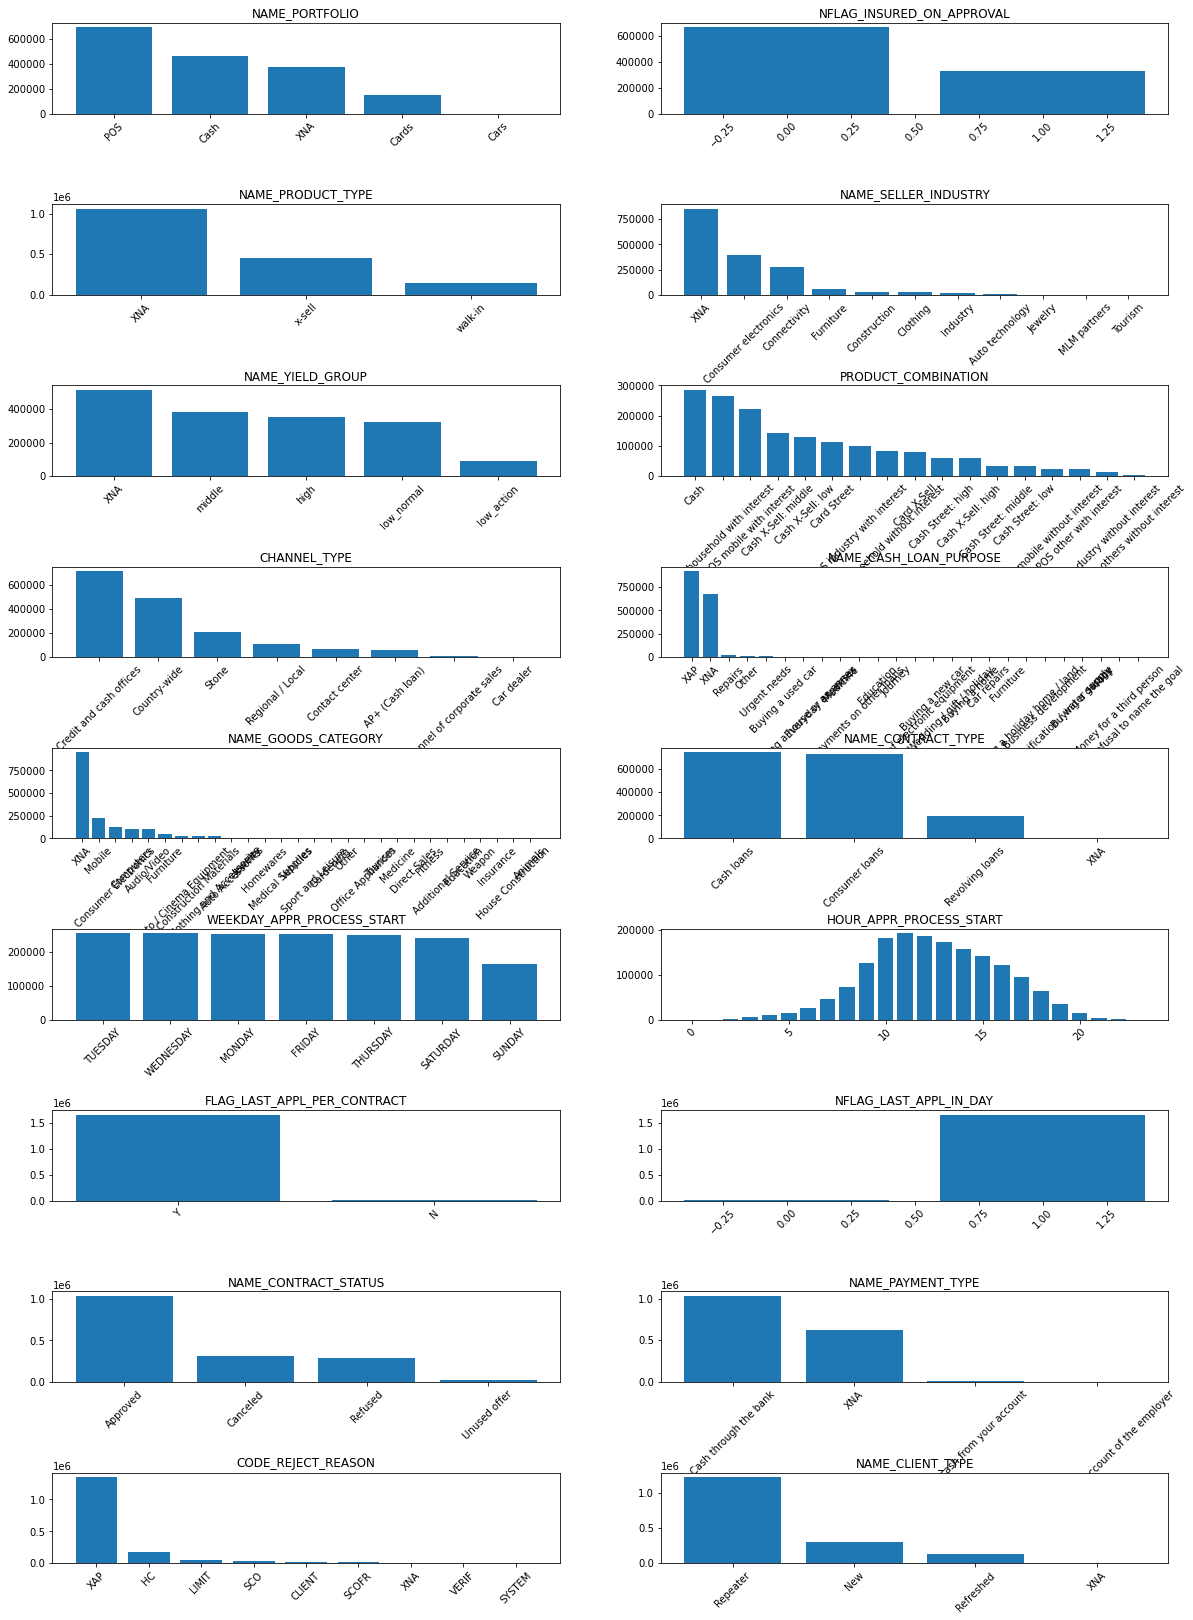

In [ ]:
#here we will explore categorical features:
fig = plt.figure(figsize=(20,35))
for i, cat_col in enumerate(prev_app_cat_cols):
    plt.subplot(11,2,i+1)
    counts = prev_app[cat_col].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(cat_col)
    plt.xticks(rotation=45)
    fig.subplots_adjust(hspace=1)

**EDA 1.5: Installments_payments**

The data of payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
inst_pay = tbl_dict["installments_payments"]
print("installments_payments")
print('-'*80)
print(f'Shape: {inst_pay.shape}')
print('-'*80)
print(f'Duplicate value counts: {inst_pay.shape[0] - inst_pay.duplicated().shape[0]}')
print('-'*80)
print(f'Describe installments_payments:')
print('\n')
print(inst_pay.describe())

installments_payments
--------------------------------------------------------------------------------
Shape: (13605401, 8)
--------------------------------------------------------------------------------
Duplicate value counts: 0
--------------------------------------------------------------------------------
Describe installments_payments:


         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.

**EDA 1.5.1: Numercal and categorical features**

In [ ]:
inst_pay_cat = tbl_dict["installments_payments"].select_dtypes(include=['object', 'bool']).columns
inst_pay_num = tbl_dict["installments_payments"].select_dtypes(include=['int64', 'float64']).columns
inst_pay_num_list = list(inst_pay_num)
inst_pay_cat_list= list(inst_pay_cat)
print("There are (",str(len(inst_pay_cat_list)),")",'Categorical Features:','\n', inst_pay_cat_list)
print('-'*100)
print('\n')
print("There are (",str(len(inst_pay_num_list)),")",'Numerical Features:','\n',inst_pay_num_list)

There are ( 0 ) Categorical Features: 
 []
----------------------------------------------------------------------------------------------------


There are ( 8 ) Numerical Features: 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']


**EDA 1.5.2: Missing values**

In [ ]:
inst_pay_missing_prct = (tbl_dict["installments_payments"].isnull().sum()/tbl_dict["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
inst_pay_missing_sum = tbl_dict["installments_payments"].isnull().sum().sort_values(ascending = False)
inst_pay_total_count = tbl_dict["installments_payments"].isnull().count()
missing_inst_pay_df  = pd.concat([inst_pay_missing_prct, inst_pay_missing_sum, inst_pay_total_count], axis=1, keys=['Missing_cercent', "Missing_count", "Total_count"])
missing_inst_pay_df.head(20)


,Missing_cercent,Missing_count,Total_count
DAYS_ENTRY_PAYMENT,0.02,2905,13605401
AMT_PAYMENT,0.02,2905,13605401
SK_ID_PREV,0.00,0,13605401
SK_ID_CURR,0.00,0,13605401
NUM_INSTALMENT_VERSION,0.00,0,13605401
NUM_INSTALMENT_NUMBER,0.00,0,13605401
DAYS_INSTALMENT,0.00,0,13605401
AMT_INSTALMENT,0.00,0,13605401


In [ ]:
dftmp=tbl_dict["installments_payments"]
dftmp.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**EDA 1.5.3: Feature engineering**

looking at the features in installments_payments table we can see that there are other features that can be very usefull and can be derived from existing features and can enhance model performance, like the difference between installment amount and the actual paid amount and the percentage of the paid amount from the installment amount to know quickly if the full installment was paid or not, we will call them Diff_pay_amt and pay_amt_perc

# Modeling Pipelines

In [ ]:
tbl_dict['application_train']['HOUR_APPR_PROCESS_START'].head()

0    10
1    11
2     9
3    17
4    11
Name: HOUR_APPR_PROCESS_START, dtype: int64

**Application transformer**

In [ ]:
class AppCustomTransform(BaseEstimator, TransformerMixin):
    '''
    AppTransform class takes a list of features to be transformed :
      * Replaces extreme values for DAYS_EMPLOYED with a 0 and replaces negative values in DAYS_EMPLOYED with positive values
      * Flags high income occupations by updating OCCUPATION_TYPE to be a binary field
      * handles extreme values in CNT_CHILDREN, DEF_30_CNT_SOCIAL_CIRCLE and AMT_INCOME_TOTAL.
      *
    '''
    def __init__(self, features=None):
        self.features=features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        '''
        input Args:
          X : Pandas dataframe
          y : an Array or series of target values

        Returns a pandas dataframe after transformation (app_df)
        '''

        app_df = X[self.features].copy(deep=True)
        app_df['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where(app_df.AMT_REQ_CREDIT_BUREAU_QRT>4,4,
                                                  app_df.AMT_REQ_CREDIT_BUREAU_QRT)
        
        
        app_df['DEF_30_CNT_SOCIAL_CIRCLE'] = np.where(app_df.DEF_30_CNT_SOCIAL_CIRCLE>4,4,
                                                 app_df.DEF_30_CNT_SOCIAL_CIRCLE)
        
        
        # numerical features
        app_df['AMT_INCOME_TOTAL'] = np.where(app_df.AMT_INCOME_TOTAL >=2000000,
                                         2000000, app_df.AMT_INCOME_TOTAL)
        
        app_df['DAYS_EMPLOYED'] = np.where(app_df.DAYS_EMPLOYED > 0,
                            app_df.DAYS_EMPLOYED.median(), app_df.DAYS_EMPLOYED)
        # make positive
        app_df['DAYS_EMPLOYED'] = app_df.DAYS_EMPLOYED * -1
        app_df['DAYS_BIRTH'] = app_df.DAYS_BIRTH * -1

        # flag applicants where income_type is commerical associates then drop original column
        #print(app_df.NAME_INCOME_TYPE.head())
        app_df['COMMERCIAL_ASSOC'] = np.where(app_df.NAME_INCOME_TYPE=='Commercial associate', 1, 0)

        app_df['HIGHER_ED'] = np.where(app_df.NAME_EDUCATION_TYPE.str.contains('Higher education|Academic degree', regex=True), 1, 0)
        app_df['SECONDARY'] = np.where(app_df.NAME_EDUCATION_TYPE.str.lower().str.contains('secondary'), 1, 0)

        app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in\
                                  ['Core Staff', 'Accountants', 'Managers',
                                   'Medicine Staff', 'High Skill Tech Staff',
                                   'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)

        app_df['MARRIED'] = np.where(app_df.NAME_FAMILY_STATUS=='Married', 1, 0)

        app_df['HOME_W_PARENTS'] = np.where(app_df.NAME_HOUSING_TYPE=='With parents',1,0)

        # how many days an applicant has worked since 18 years old
        app_df['PCT_LIFE_EMPLOYED'] = app_df.DAYS_EMPLOYED / (app_df.DAYS_BIRTH - (18 * 365.25))

        app_df['EXT_1_IMPUTED'] = np.where(app_df.EXT_SOURCE_1.isnull(), 1, 0)
        
        # drop columns
        app_df.drop(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
                axis=1, inplace=True)
        
        app_df["LOAN_TO_INCOME"] = app_df["AMT_GOODS_PRICE"]/app_df["AMT_INCOME_TOTAL"]
        app_df["DEBT_TO_INCOME"] = app_df["AMT_CREDIT"]/app_df["AMT_INCOME_TOTAL"]
        app_df["LOAN_TO_VALUE"] = app_df["AMT_CREDIT"]/app_df["AMT_GOODS_PRICE"]
        
        app_df.columns = ['SK_ID_CURR'] + ['APP_' + x for x in app_df.columns.tolist()[1:]] #add prefix to column names
        # Add target if it exists
        if 'TARGET' in X.columns:
          app_df = app_df.join(X["TARGET"])
        return app_df 

In [ ]:
#impute catigorical features with mode and dummy
app_cat_feats = [
                'NAME_CONTRACT_TYPE',
                'FLAG_OWN_CAR',
                'FLAG_OWN_REALTY',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'REGION_RATING_CLIENT',
                'REG_CITY_NOT_LIVE_CITY',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_18'
                ]


# categorical features custom transformations
app_cat_custm_feats = [
                'NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE',
                'AMT_REQ_CREDIT_BUREAU_QRT',
                'DEF_30_CNT_SOCIAL_CIRCLE',
                'OCCUPATION_TYPE'

]

# numerical features imputation
app_num_feats= [
            'AMT_CREDIT',
            'AMT_GOODS_PRICE',
            'DAYS_LAST_PHONE_CHANGE',
            'DAYS_REGISTRATION',
            'DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE',
            'AMT_ANNUITY',
            'EXT_SOURCE_1',
            'EXT_SOURCE_2',
            'EXT_SOURCE_3'

]

# numerical features custom transformations
app_num_custm_feats = [
            'AMT_INCOME_TOTAL',
            'DAYS_EMPLOYED',
            'DAYS_BIRTH'
]


In [ ]:
app_feats = ['SK_ID_CURR'] + app_cat_feats + app_num_feats + app_cat_custm_feats + app_num_custm_feats

**Buearu Transformer**

In [ ]:

class bureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    '''
    This class takes a list of features to aggregate as input:
    - aggrigates 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM','CREDIT_DAY_OVERDUE' by SK_ID_CURR.
    - for phase 2 we are adding min, sum and mean of the features above.
    - creates the feature AVAIL_LIMIT which equals the unused available amount for a loan.
    '''
    def __init__(self, features=None): 
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        '''
        input Args:
          X : Pandas dataframe
          y : Array or seies of target values

        Returns:
          Transformed dataframe (final_df)
        '''
        result = X[self.features].copy(deep=True)
        min_features = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE']
        sum_features = ['DAYS_CREDIT_ENDDATE', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG','AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE']
        mean_features = ['DAYS_CREDIT', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE']
        
        X_min = result[['SK_ID_CURR'] + min_features].groupby('SK_ID_CURR').min().reset_index()
        X_min.columns = ['SK_ID_CURR'] + [x + '_min' for x in X_min.columns.tolist()[1:]]
        X_mean = result[['SK_ID_CURR'] + mean_features].groupby('SK_ID_CURR').mean().reset_index()
        X_mean.columns = ['SK_ID_CURR'] + [x + '_mean' for x in X_mean.columns.tolist()[1:]]
        X_sum = result[['SK_ID_CURR'] + sum_features].groupby('SK_ID_CURR').sum().reset_index()
        X_sum.columns = ['SK_ID_CURR'] + [x + '_sum' for x in X_sum.columns.tolist()[1:]]
        final_df = X_min.merge(X_mean, how='left', on='SK_ID_CURR').merge(X_sum, how='left', on='SK_ID_CURR')

        ## The following aggregation applies only to active credit sources ACS.
        ACS = result[X.CREDIT_ACTIVE=='Active'].copy(deep=True)
        ACS['N_ACTIVE_SOURCES'] = np.where(ACS.CREDIT_ACTIVE=='Active', 1, 0)
        ACS['N_OVERDUE'] = np.where(ACS.CREDIT_DAY_OVERDUE > 0, 1, 0)
        ACS = ACS.groupby('SK_ID_CURR')['N_ACTIVE_SOURCES', 'N_OVERDUE'].sum().reset_index()
        ACS['PCT_ACTIVE_OVERDUE'] = ACS.N_OVERDUE / ACS.N_ACTIVE_SOURCES
        ACS.columns = ['SK_ID_CURR'] + [x for x in ACS.columns.tolist()[1:]] 
        final_df = final_df.merge(ACS, how='outer', on='SK_ID_CURR')

        final_df['AVAIL_LIMIT'] = final_df['AMT_CREDIT_SUM_sum'] - final_df['AMT_CREDIT_SUM_DEBT_sum']# available credit limit
        
        final_df.columns = ['SK_ID_CURR'] + ['BR_' + x for x in final_df.columns.tolist()[1:]] # add BR prefix
        return final_df # return joined dataframe on the column "SK_ID_CURR"

In [ ]:
bureau_in_feats=['SK_ID_CURR','CREDIT_ACTIVE','AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
                       'CREDIT_TYPE', 'DAYS_CREDIT', 'DAYS_ENDDATE_FACT', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG',
                       'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE',
                       'DAYS_CREDIT_ENDDATE']

**POS Cash Balance Transformer**

In [ ]:
class pos_cash_balanceFeaturesAggregater(BaseEstimator, TransformerMixin):
    '''
    This aggrigates the following features by SK_ID_CURR:
    * 'SK_DPD_DEF','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD'
    It also calculates the mean of the above features, the max of SK_DPD and SK_DPD_DEF, the number
    of POS loans

    Args:
    features (list) :   List of features to aggregate
    '''

    def __init__(self, features=None): # no *args or **kargs
        self.features = features
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Args:
          X (object): Pandas dataframe
          y (object): Series or Array of target values

        Returns:
          result (object): Transformed pandas dataframe

        '''
        max_features = ['SK_DPD', 'SK_DPD_DEF']
        mean_features = ['SK_DPD', 'SK_DPD_DEF', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']
        


        X = X[self.features].copy(deep=True)
        pos_result = X.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index().rename(columns={'SK_ID_PREV': 'POS_N_LOANS'})

        X_mean = X[['SK_ID_CURR'] + mean_features].groupby('SK_ID_CURR').mean().reset_index()
        X_mean.columns = ['SK_ID_CURR'] + ['POS_' + x + '_mean' for x in X_mean.columns.tolist()[1:]]# add prefix for mean columns

        X_max = X[['SK_ID_CURR'] + max_features].groupby('SK_ID_CURR').max().reset_index()
        X_max.columns = ['SK_ID_CURR'] + ['POS_' + x + '_max' for x in X_max.columns.tolist()[1:]]# add prefix for max columns

        pos_result = pos_result.merge(X_mean, how='left', on='SK_ID_CURR').merge(X_max, how='left', on='SK_ID_CURR') # combine all results in one table
        return pos_result # return dataframe with the join key "SK_ID_CURR"

In [ ]:
pos_features = ['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD', 'SK_DPD_DEF', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

**Credit Card Balance Transformer**

In [ ]:
class Cred_CBCustomTransform(BaseEstimator, TransformerMixin):
    '''
    This class:
      - adding engineered feature aggregates to get the mean count for credit lines per unique SK_ID_CURR.
      - It also adds the following calculated features
        * credit utilization
        * the ratio of monthly withdraws vs credit limit
        * the average minimum payment for an applicant
          i.e.someone who pays below minimum will have a value of 1)
        * late payment percentage 

    Args:
    features (list) :   List of features to transform
    '''
    
    def __init__(self, features=None):
        self.features = features
            
    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        '''
        Args:
          X (object): Pandas dataframe
          y (object): Series or Array of target values

        Returns:
          result (object): Transformed pandas dataframe

        '''
        aggrigated_features = ['CREDIT_UTIL', 'DRAWINGS_LIMIT_RATIO','AMT_RECEIVABLE_INTEREST', 'CNT_DRAWINGS_CURRENT', 
                               'LATE_PAYMENT','AMT_BALANCE', 'CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT','AMT_INST_MIN_REGULARITY' ]

        X = X[self.features].copy(deep=True).fillna(0) # set nulls to zero if there is no payment or no balance

        
        X['CREDIT_UTIL'] = X.AMT_BALANCE / X.AMT_CREDIT_LIMIT_ACTUAL
        X['DRAWINGS_LIMIT_RATIO'] = X.AMT_DRAWINGS_CURRENT / X.AMT_CREDIT_LIMIT_ACTUAL # the next couple of lines will handle infinity result when there is no limit

        X.CREDIT_UTIL = X.CREDIT_UTIL.replace([np.inf, -np.inf], 0)
        X.DRAWINGS_LIMIT_RATIO = X.DRAWINGS_LIMIT_RATIO.replace([np.inf, -np.inf], 0)
        X['PCT_MIN_PAYMENT_SHORT'] = (X.AMT_INST_MIN_REGULARITY - X.AMT_PAYMENT_CURRENT) / X.AMT_INST_MIN_REGULARITY
        X['LATE_PAYMENT'] = np.where(X.SK_DPD_DEF >0, 1, 0)
      
        X['AMT_RECEIVABLE_INTEREST'] = X.AMT_TOTAL_RECEIVABLE - X.AMT_RECEIVABLE_PRINCIPAL
        X['PCT_PAY_INTEREST'] = X.AMT_RECEIVABLE_INTEREST / X.AMT_TOTAL_RECEIVABLE 

        X = X.fillna(0)# before we do any calculations, we will fill na with zeros
        X_max = X[['SK_ID_CURR'] + aggrigated_features].groupby('SK_ID_CURR').max().reset_index()
        X_max.columns = ['SK_ID_CURR'] + ['CRED_' + x + '_max' for x in X_max.columns.tolist()[1:]]
        X_mean = X[['SK_ID_CURR'] + aggrigated_features].groupby('SK_ID_CURR').mean().reset_index()
        X_mean.columns = ['SK_ID_CURR'] + ['CRED_' + x + '_mean' for x in X_mean.columns.tolist()[1:]]
        
        df_result = X_mean.merge(X_max, how='left', on='SK_ID_CURR')
        return df_result
       

In [ ]:
credit_CB_features = ['AMT_INST_MIN_REGULARITY', 'AMT_TOTAL_RECEIVABLE', 'AMT_RECEIVABLE_PRINCIPAL',
                      'AMT_DRAWINGS_CURRENT', 'SK_DPD_DEF','SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_DRAWINGS_ATM_CURRENT',
                      'CNT_DRAWINGS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_PAYMENT_CURRENT'
                      ] 

**Installments Payments Transformer**

In [ ]:
class instPayFeaturesAggregater(BaseEstimator, TransformerMixin):
    '''
    This class:
      - Creates new features of aggregations of columns: SHORT_FLAG,AMT_SHORT, DAYS_PAST_DUE, LATE_FLAG 
      - Flags late payments
      - Flags short payments
      - Calculates the pct of a payment
    Args:
    features (list) :   List of features to aggregate
    '''
    
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Args:
          X (object): Pandas dataframe
          y (object): Series or Array of target values

        Returns:
          result (object): Transformed pandas dataframe

        '''
        mean_features = ['SHORT_FLAG','AMT_SHORT','LATE_FLAG','DAYS_PAST_DUE']
        min_features = ['PCT_PAID']
        max_features = ['AMT_SHORT']
        
        X = X[self.features].copy(deep=True)

        X['DAYS_PAST_DUE'] = X.DAYS_ENTRY_PAYMENT - X.DAYS_INSTALMENT
        X['LATE_FLAG'] = np.where(X.DAYS_PAST_DUE >0,1,0)
        X['AMT_SHORT'] = X.AMT_INSTALMENT - X.AMT_PAYMENT
        X['SHORT_FLAG'] = np.where(X.AMT_SHORT > 0,1,0)
        X['PCT_PAID'] = 1 - X.AMT_SHORT / X.AMT_INSTALMENT # next line handles infinity values when the amount is zero

        X.PCT_PAID = X.PCT_PAID.replace([np.inf, -np.inf], 0)

        X_mean = X[['SK_ID_CURR'] + mean_features].groupby('SK_ID_CURR').mean().reset_index()
        X_mean.columns = ['SK_ID_CURR'] + [x + '_mean' for x in X_mean.columns.tolist()[1:]]
        X_min = X[['SK_ID_CURR'] + min_features].groupby('SK_ID_CURR').min().reset_index()
        X_min.columns = ['SK_ID_CURR'] + [x + '_min' for x in X_min.columns.tolist()[1:]]
        X_max = X[['SK_ID_CURR'] + max_features].groupby('SK_ID_CURR').max().reset_index()
        X_max.columns = ['SK_ID_CURR'] + [x + '_max' for x in X_max.columns.tolist()[1:]]
        version = X.groupby('SK_ID_CURR')['NUM_INSTALMENT_VERSION'].min().reset_index() # instead of the version number we want to know if the payment calender changed or not
        version['INSTALLMENT_CHANGE'] = np.where(version.NUM_INSTALMENT_VERSION>0,1,0)
        version.drop('NUM_INSTALMENT_VERSION', axis=1, inplace=True)
        
        result = version.merge(X_mean, how='left', on='SK_ID_CURR').merge(X_min, how='left', on='SK_ID_CURR').merge(X_max, how='left', on='SK_ID_CURR')
                
        # add prefix to column names
        result.columns = ['SK_ID_CURR'] + ['INS_' + x for x in result.columns.tolist()[1:]]

        return result

In [ ]:
instpay_features =['SK_ID_CURR', 'DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT',
                          'NUM_INSTALMENT_VERSION', 'AMT_PAYMENT', 'AMT_INSTALMENT']

**Previous Application Transformer**

In [ ]:
class prevappFeaturesAggregater(BaseEstimator, TransformerMixin):
    '''
    - Creating new binary features that are averaged for an applicant
    - Calculating mean of the following features: 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'CNT_PAYMENT', 'HOUR_APPR_PROCESS_START',
    'AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE' .

    Args:
    features (list) :   List of features to aggregate
    '''


    def __init__(self, features=None): # no *args or **kargs
        self.features = features

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Args:
          X (object): Pandas dataframe
          y (object): Series or Array of target values

        Returns:
          final_result (object): Transformed pandas dataframe

        '''
        X = X[self.features].copy(deep=True)

        X['CANCELLED'] = np.where(X.NAME_CONTRACT_STATUS=='Canceled', 1, 0)
        X['REFUSED'] = np.where(X.NAME_CONTRACT_STATUS=='Refused', 1, 0)
        X['CONSUMER_LOAN'] = np.where(X.NAME_CONTRACT_TYPE=='Consumer loans', 1, 0)
        X['REVOLV_LOAN'] = np.where(X.NAME_CONTRACT_TYPE=='Revolving loans', 1, 0)
        X['CASH_PAYMENT'] = np.where(X.NAME_PAYMENT_TYPE=='Cash through the bank', 1, 0)
        X['REJECT_HC'] = np.where(X.CODE_REJECT_REASON=='HC', 1, 0)
        X['REJECT_LIMIT'] = np.where(X.CODE_REJECT_REASON=='LIMIT', 1, 0)
        X['REJECT_SCOFR'] = np.where(X.CODE_REJECT_REASON=='SCOFR', 1, 0)
        X['NEW_CLIENT'] = np.where(X.NAME_CLIENT_TYPE=='New', 1, 0)
        X['REFRESHED_CLIENT'] = np.where(X.NAME_CLIENT_TYPE=='Refreshed', 1, 0)
        X['YIELD_HIGH'] = np.where(X.NAME_YIELD_GROUP=='High', 1, 0)
        X['YIELD_LOW_ACT'] = np.where(X.NAME_YIELD_GROUP=='low_action', 1, 0)
        X['YIELD_LOW_NORM'] = np.where(X.NAME_YIELD_GROUP=='low_normal', 1, 0)
        X['X_SELL'] = np.where(X.NAME_PRODUCT_TYPE=='x-sell', 1, 0)
        X['WALK_IN'] = np.where(X.NAME_PRODUCT_TYPE=='walk-in', 1, 0)
        X['SELL_IND_CONS_ELEC'] = np.where(X.NAME_SELLER_INDUSTRY=='Consumer electronics', 1, 0)
        X['SELL_IND_CONNECT'] = np.where(X.NAME_SELLER_INDUSTRY=='Connectivity', 1, 0)
        X['PORTF_CARDS'] = np.where(X.NAME_PORTFOLIO=='Cards', 1, 0)
        X['PORTF_POS'] = np.where(X.NAME_PORTFOLIO=='POS', 1, 0)

        num_loans = X[X.NAME_CONTRACT_STATUS=='Approved'].groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index().rename(columns={'SK_ID_PREV': 'PR_NUM_LOANS'})

        #Drop columns we binarized above
        X.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE',
                'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
                'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY', 'NAME_PORTFOLIO',
                'NAME_PRODUCT_TYPE'], axis=1, inplace=True)
        
        final_result = X.groupby('SK_ID_CURR').mean().reset_index()
        #add prefix to column names
        final_result.columns = ['SK_ID_CURR'] + ['PR_' + x + '_mean' for x in final_result.columns.tolist()[1:]]

        ### combine results and join output
        final_result = final_result.merge(num_loans, how='left', on='SK_ID_CURR')

        return final_result 
    

In [ ]:
prev_app_features = ['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_STATUS',
                       'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
                       'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY',
                       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE','AMT_ANNUITY', 'AMT_DOWN_PAYMENT',
                       'RATE_DOWN_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_DECISION',
                       'DAYS_LAST_DUE_1ST_VERSION']

# Feature Engineering and Joining Tables

In [ ]:
#Transformations pipeline

app_pipeline = Pipeline([
    ('app_transform', AppCustomTransform(app_feats))
])

bureau_pipeline = Pipeline([
        ('bureau_aggregater', bureauFeaturesAggregater(bureau_in_feats)), # Aggregate across all input features
    ])

pos_cash_balance_pipeline = Pipeline([
        ('pos_cash_balance_aggregater', pos_cash_balanceFeaturesAggregater(pos_features)), # Aggregate across all input features
    ])

instPay_pipeline = Pipeline([
        ('instPay_aggregator', instPayFeaturesAggregater(instpay_features)), # Aggregate across all input features
    ])

prevapp_pipeline = Pipeline([
        ('prevapp_aggregator', prevappFeaturesAggregater(prev_app_features)), # Aggregate across all input features
    ])
Cred_CB_pipeline = Pipeline([
        ('Cred_CB_aggregator', Cred_CBCustomTransform(credit_CB_features))
])

In [ ]:
def transformAndMergeData(X_in, merge_data=True):
  '''
 Transform and merge datasets
    
  Args:
    X_in (object) : dataframe to be transformed
    merge_data (Boolean):  merge is required or not

  Returns:
    X_out (object):tranformed dataframe

  '''
  
  X_out = app_pipeline.transform(X_in)

  bureau_aggregated = bureau_pipeline.transform(
                      tbl_dict["bureau"][tbl_dict["bureau"]['CREDIT_CURRENCY'] == 'currency 1']
                      )
  pos_cash_balance_aggregated = pos_cash_balance_pipeline.transform(tbl_dict["POS_CASH_balance"])

  prevapp_aggregated = prevapp_pipeline.transform(tbl_dict["previous_application"])

  instPay_aggregated = instPay_pipeline.transform(tbl_dict["installments_payments"])

  Cred_CB_aggregated = Cred_CB_pipeline.transform(tbl_dict["credit_card_balance"])
      

  # merge primary table and secondary tables using features based on meta data and  aggregage stats 
  if merge_data:
      X_out = X_out.merge(prevapp_aggregated, how='left', on='SK_ID_CURR')
      X_out = X_out.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
      X_out = X_out.merge(pos_cash_balance_aggregated, how='left', on="SK_ID_CURR")
      X_out = X_out.merge(instPay_aggregated, how='left', on="SK_ID_CURR")
      X_out = X_out.merge(Cred_CB_aggregated, how='left', on="SK_ID_CURR")

  display(X_out.head())
  return X_out



In [ ]:
X_train_in = tbl_dict["application_train"] #primary data set
X_train_orig = transformAndMergeData(X_train_in)
print("Shape of training dataset before transform and merge: ", tbl_dict["application_train"].shape)
print("Shape of training dataset after transform and merge: ", X_train_orig.shape)
print()

,SK_ID_CURR,APP_NAME_CONTRACT_TYPE,APP_FLAG_OWN_CAR,APP_FLAG_OWN_REALTY,APP_FLAG_EMP_PHONE,APP_FLAG_WORK_PHONE,APP_REGION_RATING_CLIENT,APP_REG_CITY_NOT_LIVE_CITY,APP_FLAG_DOCUMENT_3,APP_FLAG_DOCUMENT_6,APP_FLAG_DOCUMENT_13,APP_FLAG_DOCUMENT_14,APP_FLAG_DOCUMENT_16,APP_FLAG_DOCUMENT_18,APP_AMT_CREDIT,APP_AMT_GOODS_PRICE,APP_DAYS_LAST_PHONE_CHANGE,APP_DAYS_REGISTRATION,APP_DAYS_ID_PUBLISH,APP_REGION_POPULATION_RELATIVE,APP_AMT_ANNUITY,APP_EXT_SOURCE_1,APP_EXT_SOURCE_2,APP_EXT_SOURCE_3,APP_AMT_REQ_CREDIT_BUREAU_QRT,APP_DEF_30_CNT_SOCIAL_CIRCLE,APP_OCCUPATION_TYPE,APP_AMT_INCOME_TOTAL,APP_DAYS_EMPLOYED,APP_DAYS_BIRTH,APP_COMMERCIAL_ASSOC,APP_HIGHER_ED,APP_SECONDARY,APP_MARRIED,APP_HOME_W_PARENTS,APP_PCT_LIFE_EMPLOYED,APP_EXT_1_IMPUTED,APP_LOAN_TO_INCOME,APP_DEBT_TO_INCOME,APP_LOAN_TO_VALUE,TARGET,PR_AMT_ANNUITY_mean,PR_AMT_DOWN_PAYMENT_mean,PR_RATE_DOWN_PAYMENT_mean,PR_DAYS_FIRST_DRAWING_mean,PR_DAYS_DECISION_mean,PR_DAYS_LAST_DUE_1ST_VERSION_mean,PR_CANCELLED_mean,PR_REFUSED_mean,PR_CONSUMER_LOAN_mean,PR_REVOLV_LOAN_mean,PR_CASH_PAYMENT_mean,PR_REJECT_HC_mean,PR_REJECT_LIMIT_mean,PR_REJECT_SCOFR_mean,PR_NEW_CLIENT_mean,PR_REFRESHED_CLIENT_mean,PR_YIELD_HIGH_mean,PR_YIELD_LOW_ACT_mean,PR_YIELD_LOW_NORM_mean,PR_X_SELL_mean,PR_WALK_IN_mean,PR_SELL_IND_CONS_ELEC_mean,PR_SELL_IND_CONNECT_mean,PR_PORTF_CARDS_mean,PR_PORTF_POS_mean,PR_NUM_LOANS,BR_DAYS_CREDIT_min,BR_CREDIT_DAY_OVERDUE_min,BR_DAYS_CREDIT_mean,BR_DAYS_ENDDATE_FACT_mean,BR_DAYS_CREDIT_UPDATE_mean,BR_CREDIT_DAY_OVERDUE_mean,BR_DAYS_CREDIT_ENDDATE_sum,BR_CREDIT_DAY_OVERDUE_sum,BR_CNT_CREDIT_PROLONG_sum,BR_AMT_CREDIT_SUM_sum,BR_AMT_CREDIT_SUM_DEBT_sum,BR_AMT_CREDIT_SUM_OVERDUE_sum,BR_N_ACTIVE_SOURCES,BR_N_OVERDUE,BR_PCT_ACTIVE_OVERDUE,BR_AVAIL_LIMIT,POS_N_LOANS,POS_SK_DPD_mean,POS_SK_DPD_DEF_mean,POS_CNT_INSTALMENT_mean,POS_CNT_INSTALMENT_FUTURE_mean,POS_SK_DPD_max,POS_SK_DPD_DEF_max,INS_INSTALLMENT_CHANGE,INS_SHORT_FLAG_mean,INS_AMT_SHORT_mean,INS_LATE_FLAG_mean,INS_DAYS_PAST_DUE_mean,INS_PCT_PAID_min,INS_AMT_SHORT_max,CRED_CREDIT_UTIL_mean,CRED_DRAWINGS_LIMIT_RATIO_mean,CRED_AMT_RECEIVABLE_INTEREST_mean,CRED_CNT_DRAWINGS_CURRENT_mean,CRED_LATE_PAYMENT_mean,CRED_AMT_BALANCE_mean,CRED_CNT_DRAWINGS_ATM_CURRENT_mean,CRED_AMT_DRAWINGS_CURRENT_mean,CRED_AMT_INST_MIN_REGULARITY_mean,CRED_CREDIT_UTIL_max,CRED_DRAWINGS_LIMIT_RATIO_max,CRED_AMT_RECEIVABLE_INTEREST_max,CRED_CNT_DRAWINGS_CURRENT_max,CRED_LATE_PAYMENT_max,CRED_AMT_BALANCE_max,CRED_CNT_DRAWINGS_ATM_CURRENT_max,CRED_AMT_DRAWINGS_CURRENT_max,CRED_AMT_INST_MIN_REGULARITY_max
0,100002,Cash loans,N,Y,1,0,2,0,1,0,0,0,0,0,406597.5,351000.0,-1134.0,-3648.0,-2120,0.018801,24700.5,0.083037,0.262949,0.139376,0.0,2.0,0.0,202500.0,637.0,9461,0,0,1,0,0,0.220682,0,1.733333,2.007889,1.158397,1,9251.775,0.00,0.000000,365243.0,-606.000000,125.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,-1437.0,0.0,-874.00,-697.500000,-499.875,0.0,-2094.0,0.0,0.0,865055.565,245781.0,0.0,2.0,0.0,0.0,619274.565,1.0,0.0,0.0,24.000000,15.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,-20.421053,1.00000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,Cash loans,N,N,1,0,1,0,1,0,0,0,0,0,1293502.5,1129500.0,-828.0,-1186.0,-291,0.003541,35698.5,0.311267,0.622246,NaN,0.0,0.0,0.0,270000.0,1188.0,16765,0,1,0,1,0,0.116579,0,4.183333,4.790750,1.145199,0,56553.990,3442.50,0.050030,365243.0,-1305.000000,-1004.333333,0.000000,0.000000,0.666667,0.000000,0.666667,0.0,0.000000,0.0,0.000000,0.666667,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.666667,3.0,-2586.0,0.0,-1400.75,-1097.333333,-816.000,0.0,-2178.0,0.0,0.0,1017400.500,0.0,0.0,1.0,0.0,0.0,1017400.500,3.0,0.0,0.0,10.107143,5.785714,0.0,0.0,1.0,0.000000,0.000000,0.000000,-7.160000,1.00000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,Revolving loans,Y,Y,1,1,2,0,0,0,0,0,0,0,135000.0,135000.0,-815.0,-4260.0,-

Shape of training dataset before transform and merge:  (307511, 122)
Shape of training dataset after transform and merge:  (307511, 115)



In [ ]:

X_kgle_test_in = tbl_dict['application_test'] #kaggle test set
X_kgle_test_orig = transformAndMergeData(X_kgle_test_in)
print("Shape of Kaggle test dataset before transform and merge: ", tbl_dict["application_test"].shape)
print("Shape of Kaggle test dataset after transform and merge: ", X_kgle_test_orig.shape)

,SK_ID_CURR,APP_NAME_CONTRACT_TYPE,APP_FLAG_OWN_CAR,APP_FLAG_OWN_REALTY,APP_FLAG_EMP_PHONE,APP_FLAG_WORK_PHONE,APP_REGION_RATING_CLIENT,APP_REG_CITY_NOT_LIVE_CITY,APP_FLAG_DOCUMENT_3,APP_FLAG_DOCUMENT_6,APP_FLAG_DOCUMENT_13,APP_FLAG_DOCUMENT_14,APP_FLAG_DOCUMENT_16,APP_FLAG_DOCUMENT_18,APP_AMT_CREDIT,APP_AMT_GOODS_PRICE,APP_DAYS_LAST_PHONE_CHANGE,APP_DAYS_REGISTRATION,APP_DAYS_ID_PUBLISH,APP_REGION_POPULATION_RELATIVE,APP_AMT_ANNUITY,APP_EXT_SOURCE_1,APP_EXT_SOURCE_2,APP_EXT_SOURCE_3,APP_AMT_REQ_CREDIT_BUREAU_QRT,APP_DEF_30_CNT_SOCIAL_CIRCLE,APP_OCCUPATION_TYPE,APP_AMT_INCOME_TOTAL,APP_DAYS_EMPLOYED,APP_DAYS_BIRTH,APP_COMMERCIAL_ASSOC,APP_HIGHER_ED,APP_SECONDARY,APP_MARRIED,APP_HOME_W_PARENTS,APP_PCT_LIFE_EMPLOYED,APP_EXT_1_IMPUTED,APP_LOAN_TO_INCOME,APP_DEBT_TO_INCOME,APP_LOAN_TO_VALUE,PR_AMT_ANNUITY_mean,PR_AMT_DOWN_PAYMENT_mean,PR_RATE_DOWN_PAYMENT_mean,PR_DAYS_FIRST_DRAWING_mean,PR_DAYS_DECISION_mean,PR_DAYS_LAST_DUE_1ST_VERSION_mean,PR_CANCELLED_mean,PR_REFUSED_mean,PR_CONSUMER_LOAN_mean,PR_REVOLV_LOAN_mean,PR_CASH_PAYMENT_mean,PR_REJECT_HC_mean,PR_REJECT_LIMIT_mean,PR_REJECT_SCOFR_mean,PR_NEW_CLIENT_mean,PR_REFRESHED_CLIENT_mean,PR_YIELD_HIGH_mean,PR_YIELD_LOW_ACT_mean,PR_YIELD_LOW_NORM_mean,PR_X_SELL_mean,PR_WALK_IN_mean,PR_SELL_IND_CONS_ELEC_mean,PR_SELL_IND_CONNECT_mean,PR_PORTF_CARDS_mean,PR_PORTF_POS_mean,PR_NUM_LOANS,BR_DAYS_CREDIT_min,BR_CREDIT_DAY_OVERDUE_min,BR_DAYS_CREDIT_mean,BR_DAYS_ENDDATE_FACT_mean,BR_DAYS_CREDIT_UPDATE_mean,BR_CREDIT_DAY_OVERDUE_mean,BR_DAYS_CREDIT_ENDDATE_sum,BR_CREDIT_DAY_OVERDUE_sum,BR_CNT_CREDIT_PROLONG_sum,BR_AMT_CREDIT_SUM_sum,BR_AMT_CREDIT_SUM_DEBT_sum,BR_AMT_CREDIT_SUM_OVERDUE_sum,BR_N_ACTIVE_SOURCES,BR_N_OVERDUE,BR_PCT_ACTIVE_OVERDUE,BR_AVAIL_LIMIT,POS_N_LOANS,POS_SK_DPD_mean,POS_SK_DPD_DEF_mean,POS_CNT_INSTALMENT_mean,POS_CNT_INSTALMENT_FUTURE_mean,POS_SK_DPD_max,POS_SK_DPD_DEF_max,INS_INSTALLMENT_CHANGE,INS_SHORT_FLAG_mean,INS_AMT_SHORT_mean,INS_LATE_FLAG_mean,INS_DAYS_PAST_DUE_mean,INS_PCT_PAID_min,INS_AMT_SHORT_max,CRED_CREDIT_UTIL_mean,CRED_DRAWINGS_LIMIT_RATIO_mean,CRED_AMT_RECEIVABLE_INTEREST_mean,CRED_CNT_DRAWINGS_CURRENT_mean,CRED_LATE_PAYMENT_mean,CRED_AMT_BALANCE_mean,CRED_CNT_DRAWINGS_ATM_CURRENT_mean,CRED_AMT_DRAWINGS_CURRENT_mean,CRED_AMT_INST_MIN_REGULARITY_mean,CRED_CREDIT_UTIL_max,CRED_DRAWINGS_LIMIT_RATIO_max,CRED_AMT_RECEIVABLE_INTEREST_max,CRED_CNT_DRAWINGS_CURRENT_max,CRED_LATE_PAYMENT_max,CRED_AMT_BALANCE_max,CRED_CNT_DRAWINGS_ATM_CURRENT_max,CRED_AMT_DRAWINGS_CURRENT_max,CRED_AMT_INST_MIN_REGULARITY_max
0,100001,Cash loans,N,Y,1,0,2,0,1,0,0,0,0,0,568800.0,450000.0,-1740.0,-5170.0,-812,0.018850,20560.5,0.752614,0.789654,0.159520,0.0,0.0,0.0,135000.0,2329.0,19241,0,1,0,1,0,0.183871,0,3.333333,4.213333,1.2640,3951.000,2520.0,0.104326,365243.000000,-1740.0,-1499.000000,0.00,0.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.00,1.00,0.0,1.0,1.0,-1572.0,0.0,-735.000000,-825.500000,-93.142857,0.0,577.0,0.0,0.0,1453365.00,596686.5,0.0,3.0,0.0,0.0,856678.50,2.0,0.777778,0.777778,4.000000,1.444444,7.0,7.0,1.0,0.000000,0.000000,0.142857,-7.285714,1.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Cash loans,N,Y,1,0,2,0,1,0,0,0,0,0,222768.0,180000.0,0.0,-9118.0,-1623,0.035792,17370.0,0.564990,0.291656,0.432962,0.0,0.0,0.0,99000.0,4469.0,18064,0,0,1,1,0,0.388964,0,1.818182,2.250182,1.2376,4813.200,4464.0,0.108964,365243.000000,-536.0,-376.000000,0.50,0.0,0.5,0.0,0.50,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.50,0.0,0.5,1.0,-373.0,0.0,-190.666667,-123.000000,-54.333333,0.0,1318.0,0.0,0.0,657126.00,568408.5,0.0,2.0,0.0,0.0,88717.50,1.0,0.000000,0.000000,11.700000,7.200000,0.0,0.0,1.0,0.000000,0.000000,0.111111,-23.555556,1.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,Cash loans,Y,Y,1,0,2,0,0,0,0,0,0,0,663264.0,630000.0,-856.0,-2175.0,-3503,0.019101,69777.0,NaN,0.699787,0.610991,1.0,0.0,0.0,202500.0,4458.0,20038,0,1,0,1,0,0.331117,1,3.111111,3.275378,1.0528,11478.195,3

Shape of Kaggle test dataset before transform and merge:  (48744, 121)
Shape of Kaggle test dataset after transform and merge:  (48744, 114)


# Pre-processing Pipeline

**Selected Features**

In [ ]:
num_impute_zero = [
'PR_PORTF_CARDS_mean',
'PR_DAYS_LAST_DUE_1ST_VERSION_mean',
'PR_RATE_DOWN_PAYMENT_mean',
'PR_REFUSED_mean',
'PR_REJECT_SCOFR_mean',
'PR_REFRESHED_CLIENT_mean',
'PR_CASH_PAYMENT_mean',
'PR_YIELD_LOW_NORM_mean',
'PR_NEW_CLIENT_mean',
'PR_REVOLV_LOAN_mean',
'PR_CANCELLED_mean',
'PR_REJECT_LIMIT_mean',
'PR_PORTF_POS_mean',
'PR_X_SELL_mean',
'PR_DAYS_FIRST_DRAWING_mean',
'PR_DAYS_DECISION_mean',
'PR_YIELD_LOW_ACT_mean',
'PR_CONSUMER_LOAN_mean',
'PR_REJECT_HC_mean',
'PR_AMT_DOWN_PAYMENT_mean',
'PR_WALK_IN_mean',
'PR_YIELD_HIGH_mean',
'PR_AMT_ANNUITY_mean',
'PR_SELL_IND_CONNECT_mean',
'PR_SELL_IND_CONS_ELEC_mean',
'PR_NUM_LOANS',
'BR_DAYS_CREDIT_min',
'BR_CREDIT_DAY_OVERDUE_min',
'BR_DAYS_CREDIT_mean',
'BR_DAYS_ENDDATE_FACT_mean',
'BR_DAYS_CREDIT_UPDATE_mean',
'BR_CREDIT_DAY_OVERDUE_mean',
'BR_DAYS_CREDIT_ENDDATE_sum',
'BR_CREDIT_DAY_OVERDUE_sum',
'BR_CNT_CREDIT_PROLONG_sum',
'BR_N_ACTIVE_SOURCES',
'BR_N_OVERDUE',
'BR_PCT_ACTIVE_OVERDUE',
'BR_AVAIL_LIMIT',
'POS_N_LOANS',
'POS_SK_DPD_mean',
'POS_SK_DPD_DEF_mean',
'POS_CNT_INSTALMENT_mean',
'POS_CNT_INSTALMENT_FUTURE_mean',
'POS_SK_DPD_max',
'POS_SK_DPD_DEF_max',
'INS_INSTALLMENT_CHANGE',
'INS_DAYS_PAST_DUE_mean',
'INS_LATE_FLAG_mean',
'INS_AMT_SHORT_mean',
'INS_SHORT_FLAG_mean',
'INS_PCT_PAID_min',
'INS_AMT_SHORT_max',
'CRED_AMT_BALANCE_mean',
'CRED_CNT_DRAWINGS_ATM_CURRENT_mean',
'CRED_AMT_DRAWINGS_CURRENT_mean',
'CRED_AMT_INST_MIN_REGULARITY_mean',
'CRED_CREDIT_UTIL_mean',
'CRED_DRAWINGS_LIMIT_RATIO_mean',
'CRED_AMT_RECEIVABLE_INTEREST_mean',
'CRED_CNT_DRAWINGS_CURRENT_mean',
'CRED_LATE_PAYMENT_mean',
'CRED_AMT_BALANCE_max',
'CRED_CNT_DRAWINGS_ATM_CURRENT_max',
'CRED_AMT_DRAWINGS_CURRENT_max',
'CRED_AMT_INST_MIN_REGULARITY_max',
'CRED_CREDIT_UTIL_max',
'CRED_DRAWINGS_LIMIT_RATIO_max',
'CRED_AMT_RECEIVABLE_INTEREST_max',
'CRED_CNT_DRAWINGS_CURRENT_max',
'CRED_LATE_PAYMENT_max',
'APP_LOAN_TO_INCOME',
'APP_DEBT_TO_INCOME',
'APP_LOAN_TO_VALUE'
]

num_median_feats = [
'APP_DAYS_ID_PUBLISH',
'APP_REGION_POPULATION_RELATIVE',
'APP_DAYS_LAST_PHONE_CHANGE',
'APP_DAYS_REGISTRATION',
'APP_EXT_SOURCE_1',
'APP_EXT_SOURCE_2',
'APP_EXT_SOURCE_3',
'APP_DAYS_EMPLOYED',
'APP_DAYS_BIRTH',
'APP_PCT_LIFE_EMPLOYED',
]

num_derived_in = [
'APP_AMT_CREDIT',
'APP_AMT_ANNUITY',
'APP_AMT_INCOME_TOTAL',
'APP_AMT_GOODS_PRICE',
'BR_AMT_CREDIT_SUM_OVERDUE_sum',
'BR_AMT_CREDIT_SUM_DEBT_sum',
'BR_AMT_CREDIT_SUM_sum',
]

num_derived_out = [
'EST_MONTHS_TERM',
'CREDIT_INCOME_RATIO',
'ANNUITY_INCOME_RATIO',
'DTI_RATIO',
'PCT_DEBT_OVERDUE',
'DEBT_CREDIT_RATIO'
]

ohe_feats = [
'APP_NAME_CONTRACT_TYPE',
'APP_REGION_RATING_CLIENT',
'APP_AMT_REQ_CREDIT_BUREAU_QRT',
'APP_DEF_30_CNT_SOCIAL_CIRCLE',
'APP_FLAG_OWN_CAR',
'APP_FLAG_OWN_REALTY',
]


binary_feats = [
'APP_FLAG_EMP_PHONE',
'APP_FLAG_WORK_PHONE',
'APP_OCCUPATION_TYPE',
'APP_REG_CITY_NOT_LIVE_CITY',
'APP_FLAG_DOCUMENT_3',
'APP_FLAG_DOCUMENT_6',
'APP_FLAG_DOCUMENT_13',
'APP_FLAG_DOCUMENT_14',
'APP_FLAG_DOCUMENT_16',
'APP_FLAG_DOCUMENT_18',
'APP_COMMERCIAL_ASSOC',
'APP_HIGHER_ED',
'APP_SECONDARY',
'APP_MARRIED',
'APP_HOME_W_PARENTS',
'APP_EXT_1_IMPUTED',
]

**Splitting training dataset**

In [ ]:
# Split training dataset into training, validation, test
#
from sklearn.model_selection import train_test_split

selected_features = num_impute_zero + num_median_feats + num_derived_in + ohe_feats + binary_feats
print("Count of all selected features: ", len(selected_features))
print()
print("All selected features: ", selected_features)

y_train = X_train_orig['TARGET']

# limiting features already done by pipelines for various datasets, so leaving the below commented ou
X_train = X_train_orig[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

X_kgle_test= X_kgle_test_orig[selected_features]
#y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

print(f"Original train dataset  shape: {tbl_dict['application_train'].shape}")    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kgle_test.shape}")

Count of all selected features:  113

All selected features:  ['PR_PORTF_CARDS_mean', 'PR_DAYS_LAST_DUE_1ST_VERSION_mean', 'PR_RATE_DOWN_PAYMENT_mean', 'PR_REFUSED_mean', 'PR_REJECT_SCOFR_mean', 'PR_REFRESHED_CLIENT_mean', 'PR_CASH_PAYMENT_mean', 'PR_YIELD_LOW_NORM_mean', 'PR_NEW_CLIENT_mean', 'PR_REVOLV_LOAN_mean', 'PR_CANCELLED_mean', 'PR_REJECT_LIMIT_mean', 'PR_PORTF_POS_mean', 'PR_X_SELL_mean', 'PR_DAYS_FIRST_DRAWING_mean', 'PR_DAYS_DECISION_mean', 'PR_YIELD_LOW_ACT_mean', 'PR_CONSUMER_LOAN_mean', 'PR_REJECT_HC_mean', 'PR_AMT_DOWN_PAYMENT_mean', 'PR_WALK_IN_mean', 'PR_YIELD_HIGH_mean', 'PR_AMT_ANNUITY_mean', 'PR_SELL_IND_CONNECT_mean', 'PR_SELL_IND_CONS_ELEC_mean', 'PR_NUM_LOANS', 'BR_DAYS_CREDIT_min', 'BR_CREDIT_DAY_OVERDUE_min', 'BR_DAYS_CREDIT_mean', 'BR_DAYS_ENDDATE_FACT_mean', 'BR_DAYS_CREDIT_UPDATE_mean', 'BR_CREDIT_DAY_OVERDUE_mean', 'BR_DAYS_CREDIT_ENDDATE_sum', 'BR_CREDIT_DAY_OVERDUE_sum', 'BR_CNT_CREDIT_PROLONG_sum', 'BR_N_ACTIVE_SOURCES', 'BR_N_OVERDUE', 'BR_PCT_ACTIVE_O

**Pipeline**

In [ ]:
class NumImputeTransform(BaseEstimator, TransformerMixin):

    '''
    Instead of using a simple imputer, we combine different imputation for different columns (from different sets) in this class
    This class createds the following features:
    * DEBT_CREDIT_RATIO
    * PCT_DEBT_OVERDUE
    * DTI_RATIO
    * CREDIT_INCOME_RATIO
    * ANNUITY_INCOME_RATIO
    * EST_MONTHS_TERM
    - long-Transform skewed features in applicaitons dataset
  
    '''

    def __init__(self, features=None):
        self.features=features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        '''
        Args:
          X (object): Pandas dataframe
          y (object): Series or Array of target values

        Returns:
          df (object): Transformed pandas dataframe
        '''
        df = pd.DataFrame(X.copy(), columns=self.features)
        
        # impute features in bureau dataset
        df.BR_AMT_CREDIT_SUM_OVERDUE_sum = df.BR_AMT_CREDIT_SUM_OVERDUE_sum.fillna(0.0)
        df.BR_AMT_CREDIT_SUM_DEBT_sum = df.BR_AMT_CREDIT_SUM_DEBT_sum.fillna(0.0)
        df.BR_AMT_CREDIT_SUM_sum = df.BR_AMT_CREDIT_SUM_sum.fillna(0.0)

        # impute application features with median
        goods_median = df.APP_AMT_GOODS_PRICE.median()
        credit_median = df.APP_AMT_CREDIT.median()
        annuity_median = df.APP_AMT_ANNUITY.median()
        income_median = df.APP_AMT_INCOME_TOTAL.median()
        

        df.APP_AMT_GOODS_PRICE = df.APP_AMT_GOODS_PRICE.fillna(goods_median)
        df.APP_AMT_CREDIT = df.APP_AMT_CREDIT.fillna(credit_median)
        df.APP_AMT_ANNUITY = df.APP_AMT_ANNUITY.fillna(annuity_median)
        df.APP_AMT_INCOME_TOTAL = df.APP_AMT_INCOME_TOTAL.fillna(income_median)
        

        df['EST_MONTH_TERM'] = df.APP_AMT_CREDIT / df.APP_AMT_ANNUITY
        df['CR_INC_RATIO'] = df.APP_AMT_CREDIT / df.APP_AMT_INCOME_TOTAL
        df['ANN_INCOME_RATIO'] = df.APP_AMT_ANNUITY / df.APP_AMT_INCOME_TOTAL
        df['DTI_RATIO'] = df.BR_AMT_CREDIT_SUM_DEBT_sum / df.APP_AMT_INCOME_TOTAL
        df['PCT_DBT_OVERDUE'] = np.where(df.BR_AMT_CREDIT_SUM_DEBT_sum==0, 0,df.BR_AMT_CREDIT_SUM_OVERDUE_sum / df.BR_AMT_CREDIT_SUM_DEBT_sum)
        df['DBT_CR_RATIO']  = np.where(df.BR_AMT_CREDIT_SUM_sum==0, 0,df.BR_AMT_CREDIT_SUM_DEBT_sum / df.BR_AMT_CREDIT_SUM_sum)
        
        ### log-transform skewed features
        df.APP_AMT_GOODS_PRICE = np.log1p(df.APP_AMT_GOODS_PRICE)
        df.APP_AMT_CREDIT = np.log1p(df.APP_AMT_CREDIT)
        df.APP_AMT_ANNUITY = np.log1p(df.APP_AMT_ANNUITY)
        df.APP_AMT_INCOME_TOTAL = np.log1p(df.APP_AMT_INCOME_TOTAL)
        
        
        return df

In [ ]:
num_zeros_trans_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
        ('std_scaler', StandardScaler()),
    ])

num_median_trans_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

num_custom_trans_pipeline = Pipeline([
        ('num_deriver', NumImputeTransform(num_derived_in)),
        ('std_scaler', StandardScaler()),                      
    ])

binary_trans_pipeline = Pipeline([
        ('inputer', SimpleImputer(strategy='constant', fill_value=0))
    ])

cat_trans_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, drop='first', handle_unknown="error"))
    ])

data_prep_pipeline = ColumnTransformer( transformers=[
        # (name,                transformer,     columns)
        ("num_zeroes_pipeline", num_zeros_trans_pipeline, num_impute_zero),
        ("num_median_pipeline", num_median_trans_pipeline, num_median_feats),
        ("num_custom_pipeline", num_custom_trans_pipeline, num_derived_in),
        ("binary_pipeline", binary_trans_pipeline, binary_feats),
        ("cat_pipeline", cat_trans_pipeline, ohe_feats)], 
        remainder='drop',
        n_jobs=-1
        )

# Baseline Model

In [ ]:
#format results as percentages
def pct(x):
    return round(100*x,3)

In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression(max_iter=1000))
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)

Wall time: 21.6 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print('Accuracy score',np.round(accuracy_score(y_train, model.predict(X_train)), 3))
print('ROC AUC Score',roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

Accuracy score 0.92
ROC AUC Score 0.7670853154185997


In [ ]:
exp_log = pd.DataFrame(columns=["ExpID", "Train AUC", "Test AUC","Train Time(s)", "Test Time(s)", "Experiment description"])
exp_log.loc[0] = [f"Baseline_{len(selected_features)}_features",roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                  roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                  '--', '--', "LogisticRegression - Untuned"]
exp_log

,ExpID,Train AUC,Test AUC,Train Time(s),Test Time(s),Experiment description
0,Baseline_113_features,0.767085,0.768846,--,--,LogisticRegression - Untuned


# **Hyperparameter Tuning**

Our approach will be to take each model and tune it in a GridSearchCV to find the best set of parameters, then we will run for all models together and display the results.

**Logistic regression**

In the following section we will tune logistic regression in a GridSearch CV 

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Define grid search parameters for each classifier
params_grid = {
      'penalty': ['l2'],
      'tol': [0.0001,0.001], 
      'C': [0.01,0.1],
      'class_weight': ['balanced']
  }


# Print classifier and parameters
print('****** START', 'logistic regression','*****')
parameters = params_grid
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))



# generate the pipeline
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", LogisticRegression(random_state=42))
    ])

# Execute the grid search cross validation
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=3, 
                            n_jobs=-1, verbose=1, random_state=42)

# Train model
grid_search.fit(X_train, y_train)
        
# Best estimator score
best_train_auc = grid_search.best_score_

# Best estimator fitting time
start = time()
grid_search.best_estimator_.fit(X_train, y_train)
train_time = round(time() - start, 4)


# Best estimator prediction time
start = time()
best_test_auc = grid_search.best_estimator_.score(X_test, y_test)
test_time = round(time() - start, 4)


# Collect the best parameters found by the grid search
print("Best Parameters:")
best_parameters = grid_search.best_estimator_.get_params()
param_dump = []
for param_name in sorted(params.keys()):
    param_dump.append((param_name, best_parameters[param_name]))
    print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
print("****** FINISH ",'logistic regression'," *****")
print("")

# Record the results
exp_log.loc[len(exp_log)] = ['logreg', best_train_auc, best_test_auc, train_time, test_time, json.dumps(param_dump)]

In [ ]:
exp_log

**XGBoost**

In the following section we will tune XGBoost in a GridSearch CV

In [ ]:
%%time

params_grid = {
            'n_estimators': [200, 300, 500, 700, 800],
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.7, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
            'max_depth': [3, 4, 5],
            'eta': [.005, .01, .05, .1, .3]
  }

# Print classifier and parameters
print('****** START','XGBoost','*****')
parameters = params_grid
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))



# generate the pipeline
X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)
# generate the pipeline
full_pipeline_with_predictor = Pipeline([
        ("predictor",  XGBClassifier(objective='binary:logistic', random_state=42, nthread=1))
    ])

# Execute the grid search cross validation
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=5, 
                            n_jobs=-1, n_iter=300, verbose=1, random_state=42)

# Train model
grid_search.fit(X_train_tfm, y_train, predictor__eval_set=[(X_valid_tfm, y_valid)],
                    predictor__early_stopping_rounds=30, predictor__eval_metric='auc')
# Best estimator score
best_train_auc = grid_search.best_score_

# Best estimator fitting time
start = time()
grid_search.best_estimator_.fit(X_train_tfm, y_train)
train_time = round(time() - start, 4)


# Best estimator prediction time
start = time()
best_test_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test_tfm)[:, 1])
test_time = round(time() - start, 4)

# Collect the best parameters found by the grid search
print("Best Parameters:")
best_parameters = grid_search.best_estimator_.get_params()
param_dump = []
for param_name in sorted(params.keys()):
    param_dump.append((param_name, best_parameters[param_name]))
    print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
print("****** FINISH",'XGBoost'," *****")
print("")

# Record the results
exp_log.loc[len(exp_log)] = ['xgboost', best_train_auc, best_test_auc, train_time, test_time, json.dumps(param_dump)]
display(exp_log)

**Random forest**

In the following section we will tune Random forest in a GridSearch CV

In [ ]:
%%time

params_grid = {
    
        'max_depth': [9, 11],
        'criterion' : ['gini'],
        'min_samples_leaf': [3, 5],
        'min_samples_split' : [2],
        'max_features' : ['auto'],
        'class_weight': ['balanced'],
        #'bootstrap': [True],
        'n_estimators':[200, 400]
}

print('****** START','Random forest','*****')
parameters = params_grid
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))

# generate the pipeline
X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", RandomForestClassifier(random_state=42))
    ])

# Execute the grid search cross validation
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=3, 
                            n_jobs=-1, n_iter=300, verbose=1, random_state=42)
grid_search.fit(X_train, y_train)
        
# Best estimator score
best_train_auc = grid_search.best_score_

# Best estimator fitting time
start = time()
grid_search.best_estimator_.fit(X_train, y_train)
train_time = round(time() - start, 4)

column_names = num_impute_zero + num_median_feats + num_derived_in + num_derived_out + binary_feats + \
                list(data_prep_pipeline.transformers_[4][1].named_steps["ohe"].get_feature_names(ohe_feats))
features = list(column_names)
importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
indices = np.argsort(importances)[50:]

plt.figure(figsize=(30, 30))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show();

# Best estimator prediction time
start = time()
best_test_auc = grid_search.best_estimator_.score(X_test, y_test)
test_time = round(time() - start, 4)

# Collect the best parameters found by the grid search
print("Best Parameters:")
best_parameters = grid_search.best_estimator_.get_params()
param_dump = []
for param_name in sorted(params.keys()):
    param_dump.append((param_name, best_parameters[param_name]))
    print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
print("****** FINISH",'Random forest'," *****")
print("")

# Record the results
exp_log.loc[len(exp_log)]  = ['Random forest', best_train_auc, best_test_auc, train_time, test_time, json.dumps(param_dump)]

In [ ]:
exp_log

**Multi-layer perceptron**

In [ ]:
%%time


params_grid = {
            'activation': ['logistic', 'relu'],
            'hidden_layer_sizes': [(int(X_train.shape[1]*0.8), ), (int(X_train.shape[1]*0.9), ), (int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)),  
                                   (int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5), int(X_train.shape[1]*0.2))],
            'solver': ['adam'],
            'random_state': [42],
            'alpha':[0.0001, 0.001, 0.005],
            'beta_1': [0.9],
            'beta_2': [0.999],
            'max_iter': [500],
            'learning_rate': ['constant']
}

print('****** START','MLP','*****')
parameters = params_grid
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))

# generate the pipeline
X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", MLPClassifier(hidden_layer_sizes=(int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)), 
                                  activation='relu', solver='adam', alpha=5e-2, random_state=42, max_iter=400, verbose=False))
    ])

# Execute the grid search cross validation
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=3, 
                            n_jobs=-1, n_iter=300, verbose=1, random_state=42)
grid_search.fit(X_train, y_train)
        
# Best estimator score
best_train_auc = grid_search.best_score_

# Best estimator fitting time
start = time()
grid_search.best_estimator_.fit(X_train, y_train)
train_time = round(time() - start, 4)

# Best estimator prediction time
start = time()
best_test_auc = grid_search.best_estimator_.score(X_test, y_test)
test_time = round(time() - start, 4)

# Collect the best parameters found by the grid search
print("Best Parameters:")
best_parameters = grid_search.best_estimator_.get_params()
param_dump = []
for param_name in sorted(params.keys()):
    param_dump.append((param_name, best_parameters[param_name]))
    print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
print("****** FINISH",'MLP'," *****")
print("")
# Record the results
exp_log.loc[len(exp_log)]  = ['MLP', best_train_auc, best_test_auc, train_time, test_time, json.dumps(param_dump)]

**Run GridSearchCV for all models**

in the following section we will re-run for all models

In [ ]:
%%time
classifiers = [
            ('logreg', LogisticRegression(class_weight='balanced', penalty='l2' , max_iter=1000,
                         C=0.1, tol=0.0001, random_state=42)),
            ('xgboost', XGBClassifier(objective='binary:logistic', silent=True, 
                                      random_state=42, nthread=1)),
            ('randf', RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=3,
                            max_features="auto", max_depth=11, criterion="gini",
                            class_weight="balanced", random_state=42)),
            ('mlp', MLPClassifier(hidden_layer_sizes=(int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)), 
                                  activation='relu', solver='adam', alpha=5e-2, random_state=42, max_iter=400, verbose=False))
        ]
params_grid = {
        'logreg': {
            'penalty': ['l2'],
            'tol': [0.0001, 0.00001, 0.0000001], 
            'C': [0.01, 0.1, 1],
            'class_weight': ['balanced'],
            'max_iter': [1000]
        },
        'xgboost': {
            'n_estimators': [200, 300, 500, 700, 800],
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.7, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
            'max_depth': [3, 4, 5],
            'eta': [.005, .01, .05, .1, .3]
        },

        'randf':  {
            'class_weight': ['balanced'],
            'criterion': ['gini'],
            'n_estimators': [200, 300, 400],
            'min_samples_split': [2, 3],
            'max_depth': [9, 10, 11],
            'min_samples_leaf': [2,3,4]
        },

        'mlp': {
            'activation': ['logistic', 'relu'],
            'hidden_layer_sizes': [(int(X_train.shape[1]*0.8), ), (int(X_train.shape[1]*0.9), ), (int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)),  
                                   (int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5), int(X_train.shape[1]*0.2))],
            'solver': ['adam'],
            'random_state': [42],
            'alpha':[0.0001, 0.001, 0.005],
            'beta_1': [0.9],
            'beta_2': [0.999],
            'max_iter': [500],
            'learning_rate': ['constant']
        }
    }
for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
        X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
        X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)
        # generate the pipeline
        if name == 'xgboost':
            full_pipeline_with_predictor = Pipeline([
                ("predictor", classifier)
            ])
        else:
            full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ("predictor", classifier)
            ])
        
        # Execute the grid search cross validation
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=5, 
                                   n_jobs=-1, n_iter=300, verbose=1, random_state=42)
        
        # Train model
        if name == 'xgboost' :
            grid_search.fit(X_train_tfm, y_train, predictor__eval_set=[(X_valid_tfm, y_valid)],
                            predictor__early_stopping_rounds=30, predictor__eval_metric='auc')
        else:
            grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train_auc = grid_search.best_score_

        # Best estimator fitting time
        if name == 'xgboost' :
            start = time()
            grid_search.best_estimator_.fit(X_train_tfm, y_train)
            train_time = round(time() - start, 4)
        else:
            start = time()
            grid_search.best_estimator_.fit(X_train, y_train)
            train_time = round(time() - start, 4)


        # Best estimator prediction time
        if name == 'xgboost' :
            start = time()
            best_test_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test_tfm)[:, 1])
            test_time = round(time() - start, 4)
        else:
            start = time()
            best_test_auc = grid_search.best_estimator_.score(X_test, y_test)
            test_time = round(time() - start, 4)

        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")
        print("")
        
        # Record the results
        exp_log.loc[i] = [name, best_train_auc, best_test_auc, train_time, test_time, json.dumps(param_dump)]
        display(exp_log)

In [ ]:
X_train_orig.shape

# Training models

Now that we have identified the best performing models along with their best performing parameters, we will train those models.

In [ ]:
classifiers = [
            ('logreg', LogisticRegression(class_weight='balanced', penalty='l2' , max_iter=1000,
                         C=0.1, tol=0.0001, random_state=42)),
            ('xgboost', "instantiation not needed"),
            
            ('randf', RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=3,
                            max_features="auto", max_depth=11, criterion="gini",
                            class_weight="balanced", random_state=42)),
            ('mlp', MLPClassifier(hidden_layer_sizes=(int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)), 
                                  activation='relu', solver='adam', alpha=5e-2, random_state=42, max_iter=400, verbose=False))
        ]
params_grid = {
        'logreg': {
            'penalty': ['l2'],
            'tol': [0.0001], 
            'C': [0.1],
            'class_weight': 'balanced'
        },
        'xgboost': {
            'min_child_weight': [10],
            'gamma': [5],
            'subsample': [0.8],
            'colsample_bytree': [0.6],
            'max_depth': [4],
            'eta': [0.05]
        },

        'randf':  {
                'class_weight': ['balanced'],
                'criterion': ['gini'],
                'n_estimators': [400],
                'min_samples_split': [2],
                'max_depth': [11],
                'min_samples_leaf': [3],
                'max_features': ['auto']
        },

        'mlp': {
            'activation': ['relu'],
            'hidden_layer_sizes': [(int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5))],
            'solver': ['adam'],
            'random_state': [42],
            'beta_1': [0.9],
            'beta_2': [0.999],
            'max_iter': [400],
            'learning_rate': ['constant']
        }
      }
    
models=[]
for (name, classifier) in classifiers:
    i += 1
    # Print classifier and parameters
    print('****** START', name,'*****')
    parameters = params_grid[name]
    param_dump = []
    print("Parameters:")
    for p in sorted(parameters.keys()):
        print("\t"+str(p)+": "+ str(parameters[p]))
        param_dump.append((p, parameters[p]))

    # data prep
    X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
    X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
    X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)

    if name == 'xgboost' :
        dtrain = xgb.DMatrix(X_train_tfm, label=y_train)
        dval = xgb.DMatrix(X_valid_tfm, label=y_valid)
        dtest = xgb.DMatrix(X_test_tfm, label=y_test)

        watchlist = [(dtrain, "trn"), (dval, "val")]            
    elif name == 'logreg' or name == 'randf' or name == 'mlp':
        full_pipeline_with_predictor = Pipeline([
            ("preparation", data_prep_pipeline),
            ("predictor", classifier)
        ])


    # Train model and time
    start = time()
    if name == 'xgboost' :

        params = [
        ('max_depth', 4),
        ('eta', 0.05),
        ('objective', 'binary:logistic'),
        ('min_child_weight', 10),
        ('eval_metric', 'auc'),
        ('subsample', 0.8),
        ('colsample_bytree', 0.6),
        ('gamma', 5)
      ]
        n_estimators = 800
        model = xgb.train(params, dtrain, n_estimators, evals=watchlist, early_stopping_rounds=30)    
    
    else:
        model = full_pipeline_with_predictor.fit(X_train, y_train)
    train_time = round(time() - start, 4)


    # Train score
    if name == 'xgboost':
        train_auc = roc_auc_score(y_train, model.predict(dtrain, ntree_limit=model.best_ntree_limit))

    else:
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


    # Test score and time
    if name == 'xgboost' :
        start = time()
        y_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)
        test_auc = roc_auc_score(y_test, y_pred)
        test_time = round(time() - start, 4)
    elif name == 'mlp':
        start = time()
        y_pred = model.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, y_pred)
        test_time = round(time() - start, 4)
    else:
        start = time()
        y_pred = model.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, y_pred)
        test_time = round(time() - start, 4)


    print("****** FINISH",name," *****")
    print("")

    # Record the results
    exp_log.loc[i] = [name, train_auc, test_auc, train_time, test_time, json.dumps(param_dump)]


    if name == 'xgboost':
        models.append(model)
    else:
        models.append(model)
          #print(classification_report(y_test, model.predict(X_test_tfm)))
display(exp_log)
    

****** START logreg *****
Parameters:
	C: [0.1]
	class_weight: balanced
	penalty: ['l2']
	tol: [0.0001]
****** FINISH logreg  *****

****** START xgboost *****
Parameters:
	colsample_bytree: [0.6]
	eta: [0.05]
	gamma: [5]
	max_depth: [4]
	min_child_weight: [10]
	subsample: [0.8]
[0]	trn-auc:0.70376	val-auc:0.69767
[1]	trn-auc:0.70777	val-auc:0.70186
[2]	trn-auc:0.71383	val-auc:0.70384
[3]	trn-auc:0.72538	val-auc:0.71535
[4]	trn-auc:0.73228	val-auc:0.72281
[5]	trn-auc:0.73154	val-auc:0.72280
[6]	trn-auc:0.73042	val-auc:0.72168
[7]	trn-auc:0.73444	val-auc:0.72547
[8]	trn-auc:0.73913	val-auc:0.72944
[9]	trn-auc:0.74138	val-auc:0.73222
[10]	trn-auc:0.74051	val-auc:0.73190
[11]	trn-auc:0.73953	val-auc:0.73095
[12]	trn-auc:0.74016	val-auc:0.73195
[13]	trn-auc:0.74014	val-auc:0.73215
[14]	trn-auc:0.74018	val-auc:0.73232
[15]	trn-auc:0.73927	val-auc:0.73166
[16]	trn-auc:0.73871	val-auc:0.73118
[17]	trn-auc:0.73798	val-auc:0.73026
[18]	trn-auc:0.74127	val-auc:0.73331
[19]	trn-auc:0.74059	val-au

[212]	trn-auc:0.78963	val-auc:0.77232
[213]	trn-auc:0.78973	val-auc:0.77233
[214]	trn-auc:0.78992	val-auc:0.77244
[215]	trn-auc:0.79006	val-auc:0.77249
[216]	trn-auc:0.79017	val-auc:0.77254
[217]	trn-auc:0.79027	val-auc:0.77260
[218]	trn-auc:0.79039	val-auc:0.77266
[219]	trn-auc:0.79051	val-auc:0.77268
[220]	trn-auc:0.79065	val-auc:0.77272
[221]	trn-auc:0.79076	val-auc:0.77274
[222]	trn-auc:0.79088	val-auc:0.77284
[223]	trn-auc:0.79112	val-auc:0.77286
[224]	trn-auc:0.79115	val-auc:0.77286
[225]	trn-auc:0.79125	val-auc:0.77287
[226]	trn-auc:0.79137	val-auc:0.77291
[227]	trn-auc:0.79146	val-auc:0.77295
[228]	trn-auc:0.79156	val-auc:0.77294
[229]	trn-auc:0.79169	val-auc:0.77301
[230]	trn-auc:0.79180	val-auc:0.77313
[231]	trn-auc:0.79192	val-auc:0.77320
[232]	trn-auc:0.79203	val-auc:0.77322
[233]	trn-auc:0.79212	val-auc:0.77325
[234]	trn-auc:0.79221	val-auc:0.77330
[235]	trn-auc:0.79230	val-auc:0.77339
[236]	trn-auc:0.79240	val-auc:0.77344
[237]	trn-auc:0.79252	val-auc:0.77346
[238]	trn-au

[428]	trn-auc:0.80698	val-auc:0.77816
[429]	trn-auc:0.80710	val-auc:0.77819
[430]	trn-auc:0.80715	val-auc:0.77820
[431]	trn-auc:0.80727	val-auc:0.77825
[432]	trn-auc:0.80732	val-auc:0.77827
[433]	trn-auc:0.80734	val-auc:0.77829
[434]	trn-auc:0.80739	val-auc:0.77828
[435]	trn-auc:0.80747	val-auc:0.77835
[436]	trn-auc:0.80747	val-auc:0.77835
[437]	trn-auc:0.80764	val-auc:0.77845
[438]	trn-auc:0.80770	val-auc:0.77843
[439]	trn-auc:0.80776	val-auc:0.77846
[440]	trn-auc:0.80778	val-auc:0.77847
[441]	trn-auc:0.80785	val-auc:0.77847
[442]	trn-auc:0.80790	val-auc:0.77850
[443]	trn-auc:0.80801	val-auc:0.77851
[444]	trn-auc:0.80807	val-auc:0.77852
[445]	trn-auc:0.80812	val-auc:0.77853
[446]	trn-auc:0.80815	val-auc:0.77857
[447]	trn-auc:0.80821	val-auc:0.77857
[448]	trn-auc:0.80824	val-auc:0.77857
[449]	trn-auc:0.80827	val-auc:0.77854
[450]	trn-auc:0.80832	val-auc:0.77854
[451]	trn-auc:0.80835	val-auc:0.77855
[452]	trn-auc:0.80842	val-auc:0.77859
[453]	trn-auc:0.80849	val-auc:0.77860
[454]	trn-au

[644]	trn-auc:0.81912	val-auc:0.78034
[645]	trn-auc:0.81917	val-auc:0.78034
[646]	trn-auc:0.81923	val-auc:0.78039
[647]	trn-auc:0.81929	val-auc:0.78038
****** FINISH xgboost  *****

****** START randf *****
Parameters:
	class_weight: ['balanced']
	criterion: ['gini']
	max_depth: [11]
	max_features: ['auto']
	min_samples_leaf: [3]
	min_samples_split: [2]
	n_estimators: [400]
****** FINISH randf  *****

****** START mlp *****
Parameters:
	activation: ['relu']
	beta_1: [0.9]
	beta_2: [0.999]
	hidden_layer_sizes: [(101, 56)]
	learning_rate: ['constant']
	max_iter: [400]
	random_state: [42]
	solver: ['adam']
****** FINISH mlp  *****



,ExpID,Train AUC,Test AUC,Train Time(s),Test Time(s),Experiment description
0,Baseline_113_features,0.767085,0.768846,--,--,LogisticRegression - Untuned
18,logreg,0.767559,0.768974,15.586,0.3274,"[[""C"", [0.1]], [""class_weight"", ""balanced""], [..."
19,xgboost,0.817761,0.780209,77.96,0.058,"[[""colsample_bytree"", [0.6]], [""eta"", [0.05]],..."
20,randf,0.868004,0.760543,334.5006,3.6104,"[[""class_weight"", [""balanced""]], [""criterion"",..."
21,mlp,0.803460,0.768025,80.9799,0.333,"[[""activation"", [""relu""]], [""beta_1"", [0.9]], ..."


In [ ]:
exp_log

,ExpID,Train AUC,Test AUC,Train Time(s),Test Time(s),Experiment description
0,Baseline_113_features,0.767085,0.768846,--,--,LogisticRegression - Untuned
18,logreg,0.767559,0.768974,15.586,0.3274,"[[""C"", [0.1]], [""class_weight"", ""balanced""], [..."
19,xgboost,0.817761,0.780209,77.96,0.058,"[[""colsample_bytree"", [0.6]], [""eta"", [0.05]],..."
20,randf,0.868004,0.760543,334.5006,3.6104,"[[""class_weight"", [""balanced""]], [""criterion"",..."
21,mlp,0.803460,0.768025,80.9799,0.333,"[[""activation"", [""relu""]], [""beta_1"", [0.9]], ..."


# Multi-layer perception (MLP) model - PYTORCH

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
CUDA_LAUNCH_BLOCKING=1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
!pip install pytorch-ignite

In [ ]:
from torch.utils.data import Dataset, DataLoader
from ignite.engine import create_supervised_trainer, create_supervised_evaluator, Events
from ignite.metrics import Precision, Recall, Accuracy, Loss

In [ ]:
class BC_NN(nn.Module):
    def __init__(self, D_in, H, D_out=1):
        #init 2 nn modules to be member vars 
        super(BC_NN, self).__init__()
        self.register_parameter(name='bias', param=nn.Parameter(torch.randn(3)))
        self.linear1 = torch.nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        #accepts Tensor of input data and returns Tensor of output data 
        h = self.linear1(x)
        h_relu = self.relu(h)
        y_pred = self.linear2(h_relu)
        return y_pred

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(f"We are working on a {device} device")

We are working on a cpu device


In [ ]:
# create classifier and optimizer objects
model = BC_NN(126,int(126*0.8))
model.to(device) # put on GPU before setting up the optimizer
print(f"{'-'*50}\nNETWORK\n{model}")
#summary(model, (28, 28))

--------------------------------------------------
NETWORK
BC_NN(
  (linear1): Linear(in_features=126, out_features=100, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
X_valid_tfm = data_prep_pipeline.fit_transform(X_valid, y_valid)
X_test_tfm = data_prep_pipeline.fit_transform(X_test, y_test)
X_kaggle_test_tfm = data_prep_pipeline.transform(X_kgle_test)

In [ ]:
# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class HCDR_Trainset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read in data and convert to tensor
        X_train_tf = torch.FloatTensor(X_train_tfm)
        y_train_tf = torch.LongTensor(y_train.values)

        self.n_samples = X_train_tf.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = X_train_tf # size [n_samples, n_features]
        self.y_data = y_train_tf # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
class HCDR_Testset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read in data and convert to tensor
        X_test_tf = torch.FloatTensor(X_test_tfm)
        y_test_tf = torch.LongTensor(y_test.values)

        self.n_samples = X_test_tf.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = X_test_tf # size [n_samples, n_features]
        self.y_data = y_test_tf # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
trainset = HCDR_Trainset()
train_loader = DataLoader(trainset, batch_size=10000, shuffle=True)
testset = HCDR_Testset()
test_loader = DataLoader(testset, batch_size=1000, shuffle=False)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
kaggle_test_dataset = TensorDataset( Tensor(np.array(X_kaggle_test_tfm)))
kaggle_test_loader = DataLoader(kaggle_test_dataset, shuffle=False, batch_size=1000)

In [ ]:
x,y = next(iter(train_loader))
x.shape

torch.Size([10000, 126])

In [ ]:
x,y = next(iter(test_loader))
x.shape

torch.Size([1000, 126])

In [ ]:
y.dtype

torch.int64

In [ ]:
from torch import nn
class TwoLayerNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        #init 2 nn modules to be member vars 
        super(TwoLayerNet, self).__init__()
        self.register_parameter(name='bias', param=torch.nn.Parameter(torch.randn(3)))
        self.linear1 = torch.nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        #accepts Tensor of input data and returns Tensor of output data 
        h = self.linear1(x)
        h_relu = self.relu(h)
        y_pred = self.linear2(h_relu)
        return y_pred

In [ ]:
import torch.nn.functional as F
from ignite.metrics import EpochMetric

# These decorators helps with distributed settings
from ignite.metrics.metric import sync_all_reduce, reinit__is_reduced

def roc_auc_compute_fn(y_preds, y_targets):
    try:
        from sklearn.metrics import roc_auc_score
    except ImportError:
        raise RuntimeError("This contrib module requires sklearn to be installed.")

    y_preds_ = F.softmax(y_preds, dim=1)
    y_true = y_targets.numpy()
    y_pred = y_preds_.numpy()[:,-1]
    return roc_auc_score(y_true, y_pred)

class ROC(EpochMetric):
    def __init__(self, output_transform=lambda x: x, check_compute_fn: bool = False):
        super(ROC, self).__init__(roc_auc_compute_fn, output_transform=output_transform, check_compute_fn=check_compute_fn)

In [ ]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, Precision, Recall

#use two output units + nn.CrossEntropyLoss and a target of shape [batch_size] containing the class indices
results_train = {'precision':[], 'recall':[], 'accuracy':[], 'cxe':[]}
results_test = {'precision':[], 'recall':[], 'accuracy':[], 'cxe':[]}
D_in, H, D_out = 126, int(126*0.8), 2

# Init model
model = TwoLayerNet(D_in, H, D_out)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.005, amsgrad=False)
criterion = nn.CrossEntropyLoss()
trainer = create_supervised_trainer(model, optimizer, criterion, device=device)

#To combine precision and recall to get F1 or other F metrics, we have to be careful that average=False
val_metrics = {
    'precision': Precision(average=True),
    'recall': Recall(average=True),
    "accuracy": Accuracy(),
    'roc':ROC(),
    "cxe": Loss(criterion)
}
evaluator = create_supervised_evaluator(model, metrics=val_metrics, device=device)

@trainer.on(Events.ITERATION_COMPLETED(every=1000))
def log_training_loss(trainer):
    print("Epoch[{}] Loss: {:.2f}".format(trainer.state.epoch, trainer.state.output))
    
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    evaluator.run(train_loader)
    metrics = evaluator.state.metrics
    for k,v in results_train.items():
        results_train[k].append(metrics[k])
    print("Training Results - Epoch: {}  Avg accuracy: {:.2f} Avg precision: {:.2f} Avg recall: {:.2f} ROC_AUC: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics["accuracy"], metrics['precision'], metrics['recall'], metrics['roc'], metrics['cxe']))

@trainer.on(Events.EPOCH_COMPLETED)
def log_test_results(trainer):
    evaluator.run(test_loader)
    metrics = evaluator.state.metrics
    for k,v in results_test.items():
        results_test[k].append(metrics[k])
    print("Test Results - Epoch: {}  Avg accuracy: {:.2f} Avg precision: {:.2f} Avg recall: {:.2f} ROC_AUC: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics["accuracy"], metrics['precision'], metrics['recall'], metrics['roc'], metrics['cxe']))

trainer.run(train_loader, max_epochs=100)

Training Results - Epoch: 1  Avg accuracy: 0.92 Avg precision: 0.46 Avg recall: 0.50 ROC_AUC: 0.66 Avg loss: 0.28
Test Results - Epoch: 1  Avg accuracy: 0.92 Avg precision: 0.46 Avg recall: 0.50 ROC_AUC: 0.67 Avg loss: 0.28
Training Results - Epoch: 2  Avg accuracy: 0.92 Avg precision: 0.78 Avg recall: 0.50 ROC_AUC: 0.72 Avg loss: 0.26
Test Results - Epoch: 2  Avg accuracy: 0.92 Avg precision: 0.83 Avg recall: 0.50 ROC_AUC: 0.72 Avg loss: 0.26
Training Results - Epoch: 3  Avg accuracy: 0.92 Avg precision: 0.86 Avg recall: 0.50 ROC_AUC: 0.74 Avg loss: 0.25
Test Results - Epoch: 3  Avg accuracy: 0.92 Avg precision: 0.96 Avg recall: 0.50 ROC_AUC: 0.74 Avg loss: 0.26
Training Results - Epoch: 4  Avg accuracy: 0.92 Avg precision: 0.81 Avg recall: 0.50 ROC_AUC: 0.74 Avg loss: 0.25
Test Results - Epoch: 4  Avg accuracy: 0.92 Avg precision: 0.96 Avg recall: 0.50 ROC_AUC: 0.74 Avg loss: 0.26
Training Results - Epoch: 5  Avg accuracy: 0.92 Avg precision: 0.80 Avg recall: 0.50 ROC_AUC: 0.75 Avg l

Test Results - Epoch: 37  Avg accuracy: 0.92 Avg precision: 0.73 Avg recall: 0.50 ROC_AUC: 0.76 Avg loss: 0.25
Training Results - Epoch: 38  Avg accuracy: 0.92 Avg precision: 0.84 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 38  Avg accuracy: 0.92 Avg precision: 0.77 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 39  Avg accuracy: 0.92 Avg precision: 0.89 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 39  Avg accuracy: 0.92 Avg precision: 0.74 Avg recall: 0.50 ROC_AUC: 0.76 Avg loss: 0.25
Training Results - Epoch: 40  Avg accuracy: 0.92 Avg precision: 0.84 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 40  Avg accuracy: 0.92 Avg precision: 0.78 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 41  Avg accuracy: 0.92 Avg precision: 0.85 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 41  Avg accuracy: 0.92 Avg precision: 0.77 Avg recall: 0.50 ROC_AUC: 0.77 

Training Results - Epoch: 74  Avg accuracy: 0.92 Avg precision: 0.87 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 74  Avg accuracy: 0.92 Avg precision: 0.79 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 75  Avg accuracy: 0.92 Avg precision: 0.86 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 75  Avg accuracy: 0.92 Avg precision: 0.75 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 76  Avg accuracy: 0.92 Avg precision: 0.91 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 76  Avg accuracy: 0.92 Avg precision: 0.81 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 77  Avg accuracy: 0.92 Avg precision: 0.85 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.24
Test Results - Epoch: 77  Avg accuracy: 0.92 Avg precision: 0.85 Avg recall: 0.50 ROC_AUC: 0.77 Avg loss: 0.25
Training Results - Epoch: 78  Avg accuracy: 0.92 Avg precision: 0.85 Avg recall: 0.50 ROC_AUC: 0

State:
	iteration: 2300
	epoch: 100
	epoch_length: 23
	max_epochs: 100
	output: 0.2341519296169281
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [ ]:
evaluator.run(test_loader)
print("Test Results - Avg accuracy: {:.2f} Avg precision: {:.2f} Avg recall: {:.2f} ROC_AUC: {:.2f} Avg loss: {:.2f}"
      .format(evaluator.state.metrics["accuracy"], evaluator.state.metrics['precision'], evaluator.state.metrics['recall'], evaluator.state.metrics['roc'], evaluator.state.metrics['cxe']))

Test Results - Avg accuracy: 0.92 Avg precision: 0.79 Avg recall: 0.50 ROC_AUC: 0.76 Avg loss: 0.25


In [ ]:
import torch.nn.functional as F
predictions = []

# change model mode to 'evaluation'
# disable dropout and use learned batch norm statistics
model.eval()

with torch.no_grad():
    for batch in kaggle_test_loader:
        x = batch[0]
        x.to('cpu')
#         logits = model(title)
        model.to('cpu')
        logits = model(x)

        y_pred = torch.max(logits, dim=1)[1]
        # move from GPU to CPU and convert to numpy array
        y_pred_numpy = y_pred.cpu().numpy()

        predictions = np.concatenate([predictions, y_pred_numpy])

In [ ]:
np.sum(predictions)/len(predictions)

0.0002666994912194321

In [ ]:
# record probability and true label
y_prob = []
with torch.no_grad():
    for x in kaggle_test_loader:
      data= x[0]
      y_preds_ = F.softmax(model(data), dim=1)
      y_prob += list(y_preds_.numpy()[:,-1])

In [ ]:
# Submission dataframe
nn_submit_df = tbl_dict["application_test"][['SK_ID_CURR']]
nn_submit_df['TARGET'] = y_prob

nn_submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.029114
1,100005,0.125305
2,100013,0.035585
3,100028,0.042819
4,100038,0.123115


In [ ]:
nn_submit_df.to_csv("grp14_nn_submission.csv",index=False)

In [ ]:
!kaggle competitions submit -c home-credit-default-risk -f grp14_nn_submission.csv -m "GRP14 - MLP_NN submission"

Successfully submitted to Home Credit Default Risk



  0%|          | 0.00/1.31M [00:00<?, ?B/s]
  1%|          | 8.00k/1.31M [00:00<00:41, 32.8kB/s]
  8%|7         | 104k/1.31M [00:00<00:03, 366kB/s]  
 14%|#4        | 192k/1.31M [00:00<00:02, 538kB/s]
 20%|#9        | 264k/1.31M [00:00<00:01, 598kB/s]
 26%|##5       | 344k/1.31M [00:00<00:01, 651kB/s]
 35%|###4      | 464k/1.31M [00:00<00:01, 812kB/s]
 41%|####1     | 552k/1.31M [00:00<00:01, 755kB/s]
 47%|####7     | 632k/1.31M [00:01<00:01, 497kB/s]
 53%|#####2    | 704k/1.31M [00:01<00:01, 537kB/s]
 58%|#####7    | 776k/1.31M [00:01<00:01, 572kB/s]
 63%|######3   | 848k/1.31M [00:01<00:00, 601kB/s]
 69%|######8   | 920k/1.31M [00:01<00:00, 595kB/s]
 73%|#######3  | 984k/1.31M [00:01<00:00, 538kB/s]
 78%|#######8  | 1.02M/1.31M [00:01<00:00, 519kB/s]
 85%|########4 | 1.11M/1.31M [00:02<00:00, 590kB/s]
 90%|######### | 1.18M/1.31M [00:02<00:00, 624kB/s]
 95%|#########4| 1.24M/1.31M [00:02<00:00, 632kB/s]
100%|##########| 1.31M/1.31M [00:02<00:00, 623kB/s]
100%|##########| 1.31M/1.31M

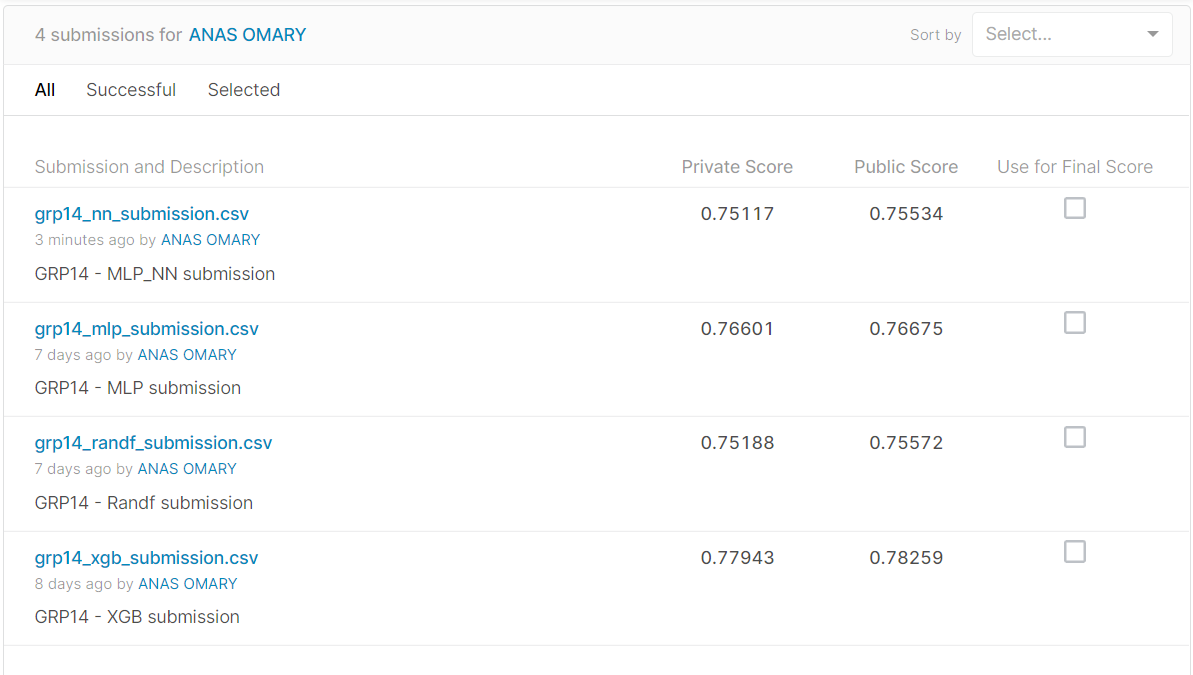

MLP model acieved 0.755 on kaggle, our best model is still XGBoost

# Hyperparameter Tuning Analysis

hyperparameter tuning analysis was done for highest performing models

**XGBoost**

In tuning the XGBoost model, we used log loss as the loss function and ROC AUC as the evaluation metric. We did a RandomizedSearchCV with the parameters found on the Xgboost site that could be helpful to both boost the accuracy and prevent overfitting. Below is also the listing of the parameters and their definitions. RandomizedSearchCV helped reduce our execution time but still it took more than 10 hours to tune. However, we had to do additional passes one parameter at a time to fine-tune and arrive at the final optimal set of parameter values. We also checked different class weights to mitigate the class imbalance, but none of the class weight parameters seemed to improve the model.

- colsample_bytree - subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
- eta - learning rate.
- gamma - minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
- max_depth - maximum depth of a tree. The deeper, the more chance of overfitting.
- min_child_weight - the minimum sum of instance weight (hessian) needed in a child. The larger min_child_weight is, the more conservative the algorithm will be.
- n_estimators - the number of trees to build
- subsample - subsample ratio of the training instances. The smaller it is, the less chance of overfitting but will affect the accuracy

**MLP**
We tuned MLP model in GridsearchCV with the following parameters:
- activation: Activation function for the hidden layer we chose relu
- solver: The solver for weight optimization we chose adam
- beta_1: Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’.
- beta_2: Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver=’adam’.
- max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- learning_rate: Learning rate schedule for weight updates

**Random forest**

Tuning random forest model was also an iterative approach. We used  ROC AUC as the evaluation metric. We started with RandomSearchCV for the parameters mentioned below. The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. The following hyperparameters are tuned in this our project:

- class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
- criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- max_features: The number of features to consider when looking for the best split, we set it to "auto" so max_features=sqrt(n_features)
- min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression
- min_samples_split: The minimum number of samples required to split an internal node:
- estimators: The number of trees in the forest.

# Evaluating best performing model

In this section we will evaluate best performing model (XGBoost)

Data preparation

In [ ]:
X_train_tfm = data_prep_pipeline.fit_transform(X_train, y_train)
X_train_tfm.shape

In [ ]:
X_valid_tfm = data_prep_pipeline.transform(X_valid)
X_valid_tfm.shape

In [ ]:
X_test_tfm = data_prep_pipeline.transform(X_test)
X_test_tfm.shape

In [ ]:
X_kaggle_test_tfm = data_prep_pipeline.transform(X_kgle_test)
X_kaggle_test_tfm.shape

In [ ]:
X_kgle_test['APP_NAME_CONTRACT_TYPE'].head()

**Evaluating XGBoost**

In [ ]:
dtrain = xgb.DMatrix(X_train_tfm, label=y_train)
dval = xgb.DMatrix(X_valid_tfm, label=y_valid)
dtest = xgb.DMatrix(X_test_tfm, label=y_test)
dkaggle_test = xgb.DMatrix(X_kaggle_test_tfm)

In [ ]:
%%time
params = [
    ('max_depth', 4),
    ('eta', 0.05),
    ('objective', 'binary:logistic'),
    ('min_child_weight', 10),
    ('eval_metric', 'auc'),
    ('subsample', 0.8),
    ('colsample_bytree', 0.6),
    ('gamma', 5)
]

watchlist = [(dtrain, "trn"), (dval, "val")]
n_estimators = 800

# This is the same as fitting
xgb_model = xgb.train(params, dtrain, n_estimators , evals=watchlist, early_stopping_rounds=30)

In [ ]:
xgb_test_auc = roc_auc_score(y_test, xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit))
print("XGB auc: ", xgb_test_auc)

In [ ]:
xgb_test_class_scores = xgb_model.predict(dkaggle_test, ntree_limit=xgb_model.best_ntree_limit)

In [ ]:
xgb_test_class_scores

**Feature importance for XGBoost**

In [ ]:
column_names = num_impute_zero + num_median_feats + num_derived_in + num_derived_out + binary_feats + \
list(data_prep_pipeline.transformers_[4][1].named_steps["ohe"].get_feature_names(ohe_feats)) 

In [ ]:
xgb_model.feature_names = list(column_names)
fig, ax = plt.subplots(1,1,figsize=(30,30))
xgb.plot_importance(xgb_model, max_num_features=75, ax=ax,importance_type='gain')

We notice that the top 5 important features are APP_EXT_Source_3, APP_EXT_Source_2,APP_SECONDARY,APP_HIGHER_ED,APP_LOAN_TO_VALUE,EXT_SOURCE_1

In [ ]:
xgb_model.best_ntree_limit

**Evaluating Random forest**

In [ ]:
clf=RandomForestClassifier(random_state=42,class_weight='balanced',criterion='gini',max_depth= 11,max_features='auto',min_samples_leaf=5,
                                   min_samples_split=2,n_estimators=400)
randf_model = clf.fit(X_train_tfm, y_train)
y_pred = randf_model.predict_proba(X_test_tfm)[:, 1]
randf_test_auc = roc_auc_score(y_test, y_pred)
print("randf auc: ", randf_test_auc)

In [ ]:
randf_test_class_scores = randf_model.predict_proba(X_kaggle_test_tfm)[:,1]

**Evaluating MLP**

In [ ]:
clf=MLPClassifier(hidden_layer_sizes=(int(X_train.shape[1]*0.9), int(X_train.shape[1]*0.5)), 
                                  activation='relu', solver='adam', alpha=5e-2, 
                  random_state=42, max_iter=400, verbose=False,beta_1=0.9,beta_2=0.999,learning_rate='constant')

mlp_model = clf.fit(X_train_tfm, y_train)
y_pred = mlp_model.predict_proba(X_test_tfm)[:, 1]
mlp_test_auc = roc_auc_score(y_test, y_pred)
print("mlp auc: ", mlp_test_auc)
mlp_test_class_scores = mlp_model.predict_proba(X_kaggle_test_tfm)[:,1]

# Kaggle Submission

In [ ]:
xgb_submit_df = tbl_dict["application_test"][['SK_ID_CURR']]
xgb_submit_df['TARGET'] = xgb_test_class_scores

xgb_submit_df.head()

In [ ]:
# Submission dataframe
randf_submit_df = tbl_dict["application_test"][['SK_ID_CURR']]
randf_submit_df['TARGET'] = randf_test_class_scores

randf_submit_df.head()

In [ ]:
mlp_submit_df = tbl_dict["application_test"][['SK_ID_CURR']]
mlp_submit_df['TARGET'] = mlp_test_class_scores

mlp_submit_df.head()

In [ ]:
xgb_submit_df.to_csv("grp14_xgb_submission.csv",index=False)

In [ ]:
randf_submit_df.to_csv("grp14_randf_submission.csv",index=False)

In [ ]:
mlp_submit_df.to_csv("grp14_mlp_submission.csv",index=False)

In [ ]:
!kaggle competitions submit -c home-credit-default-risk -f grp14_xgb_submission.csv -m "GRP14 - XGB submission"

In [ ]:
!kaggle competitions submit -c home-credit-default-risk -f grp14_randf_submission.csv -m "GRP14 - Randf submission"

In [ ]:
!kaggle competitions submit -c home-credit-default-risk -f grp14_mlp_submission.csv -m "GRP14 - MLP submission"

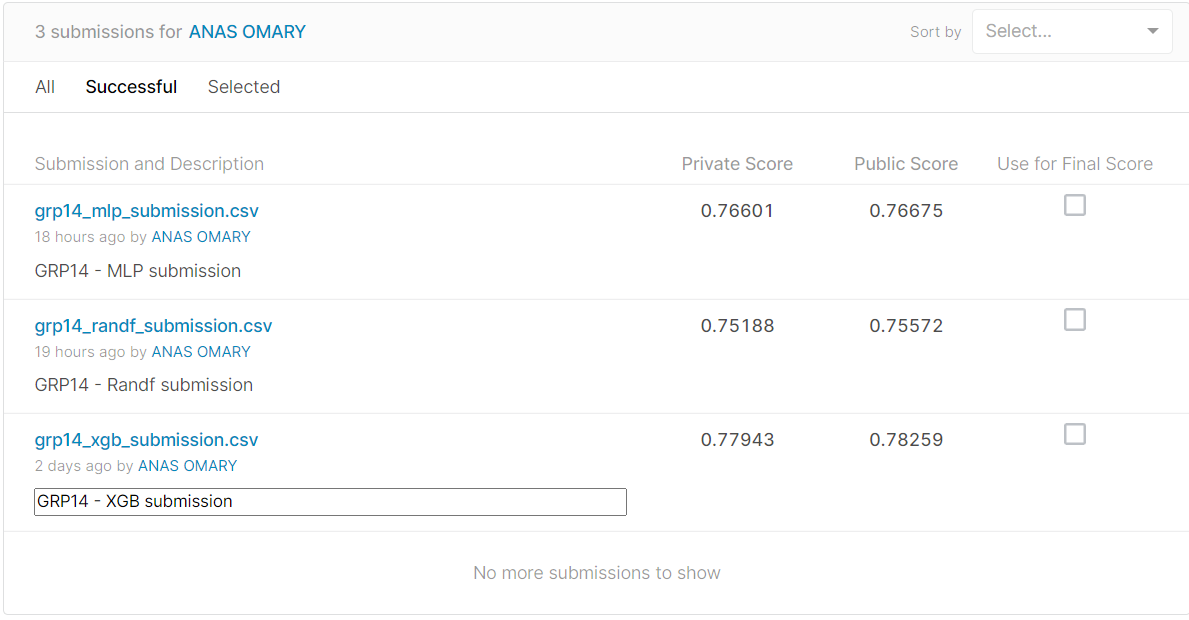

In [ ]:
exp_log

# Reporting Results

**XGBoost**

In [ ]:

from sklearn.metrics import classification_report

y_pred_x = models[1].predict(dtest, ntree_limit=models[1].best_ntree_limit)
y_pred_class_x = np.where(y_pred_x>=0.2,1,0)
print(classification_report(y_test,y_pred_class_x))

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix_xgb = confusion_matrix(y_test, y_pred_class_x,normalize='true')

group_names1 = ['True Neg','False Pos','False Neg','True Pos']

group_percentages1 = ['{0:.2%}'.format(value) for value in
                     cf_matrix_xgb.flatten()/np.sum(cf_matrix_xgb)]
                     
labels1 = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names1,group_percentages1)]
          
labels1 = np.asarray(labels1).reshape(2,2)

sns.heatmap(cf_matrix_xgb, annot=labels1, fmt='', cmap='Blues')

plt.title("Confusion Matrix for XGBoost Model", fontsize =14)

**Random forest**

In [ ]:
y_pred_randf = randf_model.predict_proba(X_test_tfm)[:, 1]
y_pred_class_randf = np.where(y_pred_randf>=0.2,1,0)
print(classification_report(y_test,y_pred_class_randf))

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix_randf = confusion_matrix(y_test, y_pred_class_randf,normalize='true')

group_names3 = ['True Neg','False Pos','False Neg','True Pos']

group_percentages3 = ['{0:.2%}'.format(value) for value in
                     cf_matrix_randf.flatten()/np.sum(cf_matrix_randf)]
                     
labels3 = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names3,group_percentages3)]
          
labels3 = np.asarray(labels3).reshape(2,2)

sns.heatmap(cf_matrix_randf, annot=labels3, fmt='', cmap='Blues')

plt.title("Confusion Matrix for Random Forest Model", fontsize =14)

**MLP**

In [ ]:
y_pred_mlp = mlp_model.predict_proba(X_test_tfm)[:, 1]
y_pred_class_mlp = np.where(y_pred_mlp>=0.2,1,0)
print(classification_report(y_test,y_pred_class_mlp))

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix_mlp = confusion_matrix(y_test, y_pred_class_mlp,normalize='true')

group_names3 = ['True Neg','False Pos','False Neg','True Pos']

group_percentages3 = ['{0:.2%}'.format(value) for value in
                     cf_matrix_mlp.flatten()/np.sum(cf_matrix_mlp)]
                     
labels3 = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names3,group_percentages3)]
          
labels3 = np.asarray(labels3).reshape(2,2)

sns.heatmap(cf_matrix_mlp, annot=labels3, fmt='', cmap='Blues')

plt.title("Confusion Matrix for MLP Model", fontsize =14)

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

print('XGBoost: ROC AUC=%.3f' % (xgb_test_auc))
print('MLP: ROC AUC=%.3f' % (mlp_test_auc))
print('Randf: ROC AUC=%.3f' % (randf_test_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_x)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_mlp)
l_fpr, l_tpr, _ = roc_curve(y_test, y_pred_randf)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGBoost')
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP')
plt.plot(l_fpr, l_tpr, linestyle='--', label='Randf')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title("ROC CURVE", fontsize = 14)
# show the plot
plt.show()

The above visualisation is the ROC curve showing the best performing models, XGBoost, MLP and Random forest

# Discussion and Conclusion
In Phases 0 and 1, we began by gaining a high-level overview of the dataset through data collection, data preprocessing, exploratory data analysis, data cleansing, data visualizations, and finally the generation of our baseline model.Preprocessing and cleansing included effectively dealing with missing values, joining tables, and the analysis of numerical and categorical features. After generating classes and modeling pipelines, the performance of the baseline untuned logistic regression model was assessed. With 113 feautures, this model had a train AUC value of 0.767 and a test AUC value of 0.769.

In Phase 2, we did further EDA and created new features to enhance model performance, we ended up with 126 features and two best perfroming models - namely XGBoost and Random Forest.
Tuning XGBoost was cumbersome and took 10 hours on a server with 32 logical cores, but it ended up being the best performing model with a slight increase in accuracy over baseline where baseline achieved 0.768 vs XGBoost which achieved 0.780 both on test set.
At the conclsuion of this stage, we believed further tuning and feature engineering might better the outcome.

During Phase 3, our MLP model using PyTorch achieved a similar result as the baseline model while our random forest model from earlier achieved slightly worse than the baseline; we still decided to include the latter in order to illustrate the differences between the models in terms of efficiency and accuracy.
We saw how when it comes to creating machine learning models EDA and feature engineering is 80% of the workload, whereas actually training and evaluating a model is a relatively straight forward task. 
